In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/Aleksandr/Desktop/CSC/Data Analysis term 2/lab 3 (prognozirovanie)")

In [3]:
# Импорт данных
elec = pd.read_csv('elec.csv', sep=';', header=0)
elec.head()

,elec
0,1254
1,1290
2,1379
3,1346
4,1535


In [4]:
#  Знакомимся с данными
elec.shape

(476, 1)

In [5]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

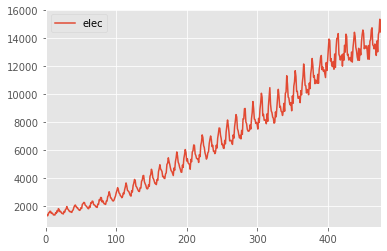

In [6]:
#  График, чтобы ответить на 4 вопроса
elec.iloc[:].plot()

Видна переодичность, виден сезонный тренд, нет пропусков, я бы сказал, что отсутствуют выбросы.

In [7]:
#  Надо прогнозировать логарифм
elec['log_y'] = np.log10(elec['elec'])

Text(0, 0.5, 'log10 a.u.')

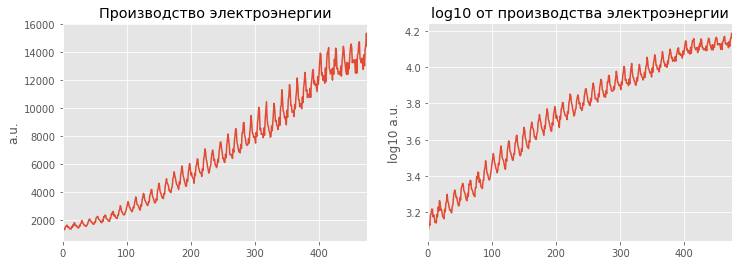

In [8]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
elec['elec'].plot(ax=ax1)
ax1.set_title(u'Производство электроэнергии')
ax1.set_ylabel(u'a.u.')

ax2 = fig.add_subplot(122)
pd.Series(elec['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от производства электроэнергии')
ax2.set_ylabel(u'log10 a.u.')


Прослеживается смена характера ряда, для прогноза оставлю данные с 400ого месяца. На этих данных сезонность не является мультипликативной, поэтому буду работать с исходным рядом, а не с логарифмированным

In [9]:
elec_short = elec[400:]['elec']

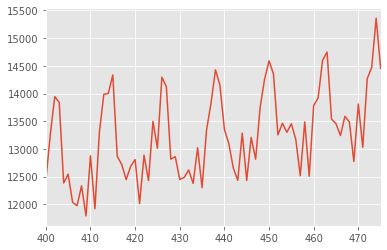

In [10]:
#  График, чтобы ответить на 4 вопроса
elec_short.iloc[:].plot()

Размах сезонных отклонений на последних данных больше, но ничего не поделаешь

In [11]:
#  Знакомимся с данными
elec_short

400    12419
401    13259
402    13945
403    13839
404    12387
       ...  
471    13032
472    14268
473    14473
474    15359
475    14457
Name: elec, Length: 76, dtype: int64

In [12]:
# Преобразуем данные

elec_2 = pd.DataFrame()

for i in range(12,0,-1):
    elec_2['t-'+str(i)] = elec_short.iloc[:].shift(i)

elec_2['t'] = elec_short.iloc[:].values

print(elec_2.head(13))




        t-12     t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
400      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
401      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
402      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
403      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
404      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
405      NaN      NaN      NaN      NaN      NaN      NaN      NaN  12419.0   
406      NaN      NaN      NaN      NaN      NaN      NaN  12419.0  13259.0   
407      NaN      NaN      NaN      NaN      NaN  12419.0  13259.0  13945.0   
408      NaN      NaN      NaN      NaN  12419.0  13259.0  13945.0  13839.0   
409      NaN      NaN      NaN  12419.0  13259.0  13945.0  13839.0  12387.0   
410      NaN      NaN  12419.0  13259.0  13945.0  13839.0  12387.0  12546.0   
411      NaN  12419.0  13259.0  13945.0  13839.0  12

In [13]:
elec_2.tail(13)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
463,14354.0,13254.0,13464.0,13302.0,13456.0,13171.0,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749
464,13254.0,13464.0,13302.0,13456.0,13171.0,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540
465,13464.0,13302.0,13456.0,13171.0,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457
466,13302.0,13456.0,13171.0,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243
467,13456.0,13171.0,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590
468,13171.0,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487
469,12517.0,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776
470,13489.0,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812
471,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032
472,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0,14268


In [14]:
#  Отрезаем первые 12 строк
elec_3 = elec_2[12:]

In [15]:
elec_3

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
412,12419.0,13259.0,13945.0,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306
413,13259.0,13945.0,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988
414,13945.0,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988.0,14002
415,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988.0,14002.0,14336
416,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988.0,14002.0,14336.0,12867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032
472,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0,14268
473,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0,14268.0,14473
474,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0,14268.0,14473.0,15359


In [16]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = elec_3['t']
# Предикторы - таблица X
X = elec_3.drop('t', axis=1)

In [17]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:52]
y_train = y[:52]
X_test  = X[52:]
y_test  = y[52:]

In [18]:
#  Все хорошо?
print(elec_3.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 13)
(52, 12)
(52,)
(12, 12)
(12,)


In [19]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [20]:
from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers
from keras import initializers

Using TensorFlow backend.


Выходная функция активационного слоя - линейная, потому что задача регрессии.
Экспериментально: активационная функция relu для входного слоя хорошо удовлетворяет задаче.
Опять же экспериментально, число нейронов на первом слое не должно быть мало(не меньше 6ти) и не очень велико (10 уже много).Поэтому выбираю 8

In [21]:
#  Обучение нейронной сети 
np.random.seed(42)
tf.compat.v1.set_random_seed(42)
tf.compat.v1.get_default_graph

model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=10000, batch_size=1)










Epoch 1/10000





52/52 [==============================] - 0s 6ms/step - loss: 154596023.9231 - mean_absolute_percentage_error: 88.3486
Epoch 2/10000
52/52 [==============================] - 0s 595us/step - loss: 7785261.8644 - mean_absolute_percentage_error: 16.0856
Epoch 3/10000
52/52 [==============================] - 0s 749us/step - loss: 988803.3750 - mean_absolute_percentage_error: 5.5810
Epoch 4/10000
52/52 [==============================] - 0s 614us/step - loss: 1021677.9321 - mean_absolute_percentage_error: 5.7156
Epoch 5/10000
52/52 [==============================] - 0s 633us/step - loss: 1017030.8447 - mean_absolute_percentage_error: 5.7665
Epoch 6/10000
52/52 [==============================] - 0s 670us/step - loss: 983681.1793 - mean_absolute_percentage_error: 5.7470
Epoch 7/10000
52/52 [==============================] - 0s 748us/step - loss: 1038892.8158 - mean_absolute_percentage_error: 5.7568
Epoch 8/10000
52/52 [==============================] - 0s 634us/step - 

52/52 [==============================] - 0s 653us/step - loss: 767014.2670 - mean_absolute_percentage_error: 4.9252
Epoch 46/10000
52/52 [==============================] - 0s 633us/step - loss: 767479.6960 - mean_absolute_percentage_error: 5.1637
Epoch 47/10000
52/52 [==============================] - 0s 575us/step - loss: 782902.7589 - mean_absolute_percentage_error: 4.9436
Epoch 48/10000
52/52 [==============================] - 0s 613us/step - loss: 902414.9028 - mean_absolute_percentage_error: 5.7884
Epoch 49/10000
52/52 [==============================] - 0s 595us/step - loss: 800584.1688 - mean_absolute_percentage_error: 5.0620
Epoch 50/10000
52/52 [==============================] - 0s 614us/step - loss: 869353.2936 - mean_absolute_percentage_error: 5.6228
Epoch 51/10000
52/52 [==============================] - 0s 651us/step - loss: 908764.9728 - mean_absolute_percentage_error: 5.4509
Epoch 52/10000
52/52 [==============================] - 0s 652us/step - loss: 800173.6628 - mean_a

52/52 [==============================] - 0s 614us/step - loss: 480018.9459 - mean_absolute_percentage_error: 3.8731
Epoch 108/10000
52/52 [==============================] - 0s 575us/step - loss: 487391.5124 - mean_absolute_percentage_error: 3.9495
Epoch 109/10000
52/52 [==============================] - 0s 595us/step - loss: 486509.5738 - mean_absolute_percentage_error: 4.0265
Epoch 110/10000
52/52 [==============================] - 0s 595us/step - loss: 523892.6385 - mean_absolute_percentage_error: 4.2493
Epoch 111/10000
52/52 [==============================] - 0s 614us/step - loss: 469474.2551 - mean_absolute_percentage_error: 3.8672
Epoch 112/10000
52/52 [==============================] - 0s 614us/step - loss: 481939.2005 - mean_absolute_percentage_error: 3.9227
Epoch 113/10000
52/52 [==============================] - 0s 595us/step - loss: 504262.7138 - mean_absolute_percentage_error: 4.0604
Epoch 114/10000
52/52 [==============================] - 0s 595us/step - loss: 491410.6510 -

52/52 [==============================] - 0s 747us/step - loss: 340814.3508 - mean_absolute_percentage_error: 3.4540
Epoch 170/10000
52/52 [==============================] - 0s 652us/step - loss: 348135.9621 - mean_absolute_percentage_error: 3.5023
Epoch 171/10000
52/52 [==============================] - 0s 634us/step - loss: 350994.2746 - mean_absolute_percentage_error: 3.5641
Epoch 172/10000
52/52 [==============================] - 0s 614us/step - loss: 335114.7820 - mean_absolute_percentage_error: 3.2638
Epoch 173/10000
52/52 [==============================] - 0s 614us/step - loss: 401879.3733 - mean_absolute_percentage_error: 3.9043
Epoch 174/10000
52/52 [==============================] - 0s 671us/step - loss: 393042.9918 - mean_absolute_percentage_error: 3.6349
Epoch 175/10000
52/52 [==============================] - 0s 595us/step - loss: 346723.2585 - mean_absolute_percentage_error: 3.5626
Epoch 176/10000
52/52 [==============================] - 0s 671us/step - loss: 358586.1901 -

52/52 [==============================] - 0s 595us/step - loss: 256978.3735 - mean_absolute_percentage_error: 3.0189
Epoch 232/10000
52/52 [==============================] - 0s 595us/step - loss: 271566.5379 - mean_absolute_percentage_error: 3.2362
Epoch 233/10000
52/52 [==============================] - 0s 652us/step - loss: 255311.4360 - mean_absolute_percentage_error: 3.0009
Epoch 234/10000
52/52 [==============================] - 0s 614us/step - loss: 227845.7220 - mean_absolute_percentage_error: 2.6571
Epoch 235/10000
52/52 [==============================] - 0s 614us/step - loss: 275494.2902 - mean_absolute_percentage_error: 3.2741
Epoch 236/10000
52/52 [==============================] - 0s 652us/step - loss: 206641.2203 - mean_absolute_percentage_error: 2.6499
Epoch 237/10000
52/52 [==============================] - 0s 595us/step - loss: 250790.7722 - mean_absolute_percentage_error: 3.2266
Epoch 238/10000
52/52 [==============================] - 0s 614us/step - loss: 213893.9592 -

52/52 [==============================] - 0s 595us/step - loss: 216780.5566 - mean_absolute_percentage_error: 2.8743
Epoch 294/10000
52/52 [==============================] - 0s 595us/step - loss: 238712.3457 - mean_absolute_percentage_error: 2.8542
Epoch 295/10000
52/52 [==============================] - 0s 691us/step - loss: 183699.0345 - mean_absolute_percentage_error: 2.6239
Epoch 296/10000
52/52 [==============================] - 0s 1ms/step - loss: 175814.0440 - mean_absolute_percentage_error: 2.5503
Epoch 297/10000
52/52 [==============================] - 0s 652us/step - loss: 178582.8811 - mean_absolute_percentage_error: 2.6031
Epoch 298/10000
52/52 [==============================] - 0s 672us/step - loss: 199604.4900 - mean_absolute_percentage_error: 2.6663
Epoch 299/10000
52/52 [==============================] - 0s 671us/step - loss: 199515.1037 - mean_absolute_percentage_error: 2.7372
Epoch 300/10000
52/52 [==============================] - 0s 632us/step - loss: 243326.6874 - m

52/52 [==============================] - 0s 595us/step - loss: 232130.6270 - mean_absolute_percentage_error: 2.8345
Epoch 356/10000
52/52 [==============================] - 0s 595us/step - loss: 201766.0718 - mean_absolute_percentage_error: 2.6986
Epoch 357/10000
52/52 [==============================] - 0s 614us/step - loss: 164747.8739 - mean_absolute_percentage_error: 2.4981
Epoch 358/10000
52/52 [==============================] - 0s 614us/step - loss: 181009.1007 - mean_absolute_percentage_error: 2.5947
Epoch 359/10000
52/52 [==============================] - 0s 633us/step - loss: 206383.0617 - mean_absolute_percentage_error: 2.7340
Epoch 360/10000
52/52 [==============================] - 0s 614us/step - loss: 273533.9757 - mean_absolute_percentage_error: 3.1220
Epoch 361/10000
52/52 [==============================] - 0s 710us/step - loss: 206076.7649 - mean_absolute_percentage_error: 2.7244
Epoch 362/10000
52/52 [==============================] - 0s 652us/step - loss: 176864.0186 -

52/52 [==============================] - 0s 729us/step - loss: 154369.8349 - mean_absolute_percentage_error: 2.4568
Epoch 418/10000
52/52 [==============================] - 0s 614us/step - loss: 183822.1435 - mean_absolute_percentage_error: 2.6653
Epoch 419/10000
52/52 [==============================] - 0s 614us/step - loss: 160464.4119 - mean_absolute_percentage_error: 2.4778
Epoch 420/10000
52/52 [==============================] - 0s 633us/step - loss: 204502.3006 - mean_absolute_percentage_error: 2.7525
Epoch 421/10000
52/52 [==============================] - 0s 710us/step - loss: 156186.0372 - mean_absolute_percentage_error: 2.4226
Epoch 422/10000
52/52 [==============================] - 0s 710us/step - loss: 149512.1838 - mean_absolute_percentage_error: 2.3956
Epoch 423/10000
52/52 [==============================] - 0s 671us/step - loss: 182780.7114 - mean_absolute_percentage_error: 2.7226
Epoch 424/10000
52/52 [==============================] - 0s 632us/step - loss: 193900.0997 -

52/52 [==============================] - 0s 595us/step - loss: 132707.5368 - mean_absolute_percentage_error: 2.1810
Epoch 480/10000
52/52 [==============================] - 0s 653us/step - loss: 143937.6648 - mean_absolute_percentage_error: 2.3260
Epoch 481/10000
52/52 [==============================] - 0s 574us/step - loss: 160336.0073 - mean_absolute_percentage_error: 2.5163
Epoch 482/10000
52/52 [==============================] - 0s 614us/step - loss: 144935.8261 - mean_absolute_percentage_error: 2.1241
Epoch 483/10000
52/52 [==============================] - 0s 594us/step - loss: 151212.5753 - mean_absolute_percentage_error: 2.3966
Epoch 484/10000
52/52 [==============================] - 0s 614us/step - loss: 134156.8333 - mean_absolute_percentage_error: 2.2864
Epoch 485/10000
52/52 [==============================] - 0s 671us/step - loss: 129679.3504 - mean_absolute_percentage_error: 2.3431
Epoch 486/10000
52/52 [==============================] - 0s 652us/step - loss: 149151.3888 -

52/52 [==============================] - 0s 729us/step - loss: 145360.0333 - mean_absolute_percentage_error: 2.3370
Epoch 542/10000
52/52 [==============================] - 0s 671us/step - loss: 138881.3495 - mean_absolute_percentage_error: 2.2775
Epoch 543/10000
52/52 [==============================] - 0s 729us/step - loss: 182929.5890 - mean_absolute_percentage_error: 2.5720
Epoch 544/10000
52/52 [==============================] - 0s 633us/step - loss: 138328.8880 - mean_absolute_percentage_error: 2.2254
Epoch 545/10000
52/52 [==============================] - 0s 634us/step - loss: 126303.5390 - mean_absolute_percentage_error: 2.3037
Epoch 546/10000
52/52 [==============================] - 0s 633us/step - loss: 150064.9568 - mean_absolute_percentage_error: 2.2957
Epoch 547/10000
52/52 [==============================] - 0s 595us/step - loss: 143552.9010 - mean_absolute_percentage_error: 2.1589
Epoch 548/10000
52/52 [==============================] - 0s 671us/step - loss: 147004.6858 -

52/52 [==============================] - 0s 633us/step - loss: 163885.1673 - mean_absolute_percentage_error: 2.3524
Epoch 604/10000
52/52 [==============================] - 0s 671us/step - loss: 141809.8962 - mean_absolute_percentage_error: 2.3079
Epoch 605/10000
52/52 [==============================] - 0s 614us/step - loss: 136447.7595 - mean_absolute_percentage_error: 2.3083
Epoch 606/10000
52/52 [==============================] - 0s 576us/step - loss: 175191.8597 - mean_absolute_percentage_error: 2.6497
Epoch 607/10000
52/52 [==============================] - 0s 594us/step - loss: 145574.1527 - mean_absolute_percentage_error: 2.3479
Epoch 608/10000
52/52 [==============================] - 0s 614us/step - loss: 134072.2488 - mean_absolute_percentage_error: 2.1285
Epoch 609/10000
52/52 [==============================] - 0s 691us/step - loss: 175126.7407 - mean_absolute_percentage_error: 2.3322
Epoch 610/10000
52/52 [==============================] - 0s 633us/step - loss: 140964.8989 -

52/52 [==============================] - 0s 633us/step - loss: 159134.0541 - mean_absolute_percentage_error: 2.4545
Epoch 666/10000
52/52 [==============================] - 0s 595us/step - loss: 144957.2829 - mean_absolute_percentage_error: 2.4243
Epoch 667/10000
52/52 [==============================] - 0s 652us/step - loss: 138275.2988 - mean_absolute_percentage_error: 2.3728
Epoch 668/10000
52/52 [==============================] - 0s 729us/step - loss: 131609.5277 - mean_absolute_percentage_error: 2.2649
Epoch 669/10000
52/52 [==============================] - 0s 652us/step - loss: 138923.9684 - mean_absolute_percentage_error: 2.3231
Epoch 670/10000
52/52 [==============================] - 0s 633us/step - loss: 130027.1389 - mean_absolute_percentage_error: 2.1645
Epoch 671/10000
52/52 [==============================] - 0s 614us/step - loss: 135168.2544 - mean_absolute_percentage_error: 2.2913
Epoch 672/10000
52/52 [==============================] - 0s 671us/step - loss: 132071.7723 -

52/52 [==============================] - 0s 614us/step - loss: 152133.4202 - mean_absolute_percentage_error: 2.3684
Epoch 727/10000
52/52 [==============================] - 0s 634us/step - loss: 129160.5754 - mean_absolute_percentage_error: 2.3680
Epoch 728/10000
52/52 [==============================] - 0s 633us/step - loss: 118566.6007 - mean_absolute_percentage_error: 2.1231
Epoch 729/10000
52/52 [==============================] - 0s 671us/step - loss: 124205.6703 - mean_absolute_percentage_error: 2.2444
Epoch 730/10000
52/52 [==============================] - 0s 614us/step - loss: 132046.5581 - mean_absolute_percentage_error: 2.2563
Epoch 731/10000
52/52 [==============================] - 0s 557us/step - loss: 136569.9367 - mean_absolute_percentage_error: 2.3464
Epoch 732/10000
52/52 [==============================] - 0s 614us/step - loss: 133760.5413 - mean_absolute_percentage_error: 2.1610
Epoch 733/10000
52/52 [==============================] - 0s 575us/step - loss: 119006.4967 -

52/52 [==============================] - 0s 710us/step - loss: 120793.9240 - mean_absolute_percentage_error: 2.1146
Epoch 789/10000
52/52 [==============================] - 0s 595us/step - loss: 142573.4702 - mean_absolute_percentage_error: 2.3896
Epoch 790/10000
52/52 [==============================] - 0s 614us/step - loss: 143209.5339 - mean_absolute_percentage_error: 2.2111
Epoch 791/10000
52/52 [==============================] - 0s 614us/step - loss: 117010.9417 - mean_absolute_percentage_error: 2.0580
Epoch 792/10000
52/52 [==============================] - 0s 652us/step - loss: 136703.8961 - mean_absolute_percentage_error: 2.1621
Epoch 793/10000
52/52 [==============================] - 0s 633us/step - loss: 117597.6760 - mean_absolute_percentage_error: 2.1167
Epoch 794/10000
52/52 [==============================] - 0s 595us/step - loss: 126095.6805 - mean_absolute_percentage_error: 2.1811
Epoch 795/10000
52/52 [==============================] - 0s 652us/step - loss: 131800.9437 -

52/52 [==============================] - 0s 614us/step - loss: 156550.8426 - mean_absolute_percentage_error: 2.4710
Epoch 850/10000
52/52 [==============================] - 0s 594us/step - loss: 202598.9302 - mean_absolute_percentage_error: 2.7232
Epoch 851/10000
52/52 [==============================] - 0s 594us/step - loss: 164182.4093 - mean_absolute_percentage_error: 2.4674
Epoch 852/10000
52/52 [==============================] - 0s 575us/step - loss: 130685.7918 - mean_absolute_percentage_error: 2.2362
Epoch 853/10000
52/52 [==============================] - 0s 633us/step - loss: 128352.0884 - mean_absolute_percentage_error: 2.2723
Epoch 854/10000
52/52 [==============================] - 0s 690us/step - loss: 134845.8345 - mean_absolute_percentage_error: 2.1609
Epoch 855/10000
52/52 [==============================] - 0s 614us/step - loss: 111007.5401 - mean_absolute_percentage_error: 1.9803
Epoch 856/10000
52/52 [==============================] - 0s 709us/step - loss: 133579.9816 -

52/52 [==============================] - 0s 767us/step - loss: 122216.7520 - mean_absolute_percentage_error: 2.1632
Epoch 912/10000
52/52 [==============================] - 0s 729us/step - loss: 124735.9587 - mean_absolute_percentage_error: 2.2339
Epoch 913/10000
52/52 [==============================] - 0s 671us/step - loss: 114172.3610 - mean_absolute_percentage_error: 2.1134
Epoch 914/10000
52/52 [==============================] - 0s 614us/step - loss: 110533.1965 - mean_absolute_percentage_error: 1.9298
Epoch 915/10000
52/52 [==============================] - 0s 710us/step - loss: 140066.1634 - mean_absolute_percentage_error: 2.3459
Epoch 916/10000
52/52 [==============================] - 0s 633us/step - loss: 128394.5375 - mean_absolute_percentage_error: 2.0145
Epoch 917/10000
52/52 [==============================] - 0s 595us/step - loss: 120967.8785 - mean_absolute_percentage_error: 2.2743
Epoch 918/10000
52/52 [==============================] - 0s 614us/step - loss: 132596.6949 -

52/52 [==============================] - 0s 575us/step - loss: 149132.5694 - mean_absolute_percentage_error: 2.3234
Epoch 974/10000
52/52 [==============================] - 0s 595us/step - loss: 125761.8403 - mean_absolute_percentage_error: 2.0828
Epoch 975/10000
52/52 [==============================] - 0s 652us/step - loss: 114084.0146 - mean_absolute_percentage_error: 2.0356
Epoch 976/10000
52/52 [==============================] - 0s 671us/step - loss: 125751.7799 - mean_absolute_percentage_error: 2.0865
Epoch 977/10000
52/52 [==============================] - 0s 595us/step - loss: 139699.4036 - mean_absolute_percentage_error: 2.2317
Epoch 978/10000
52/52 [==============================] - 0s 595us/step - loss: 173761.5942 - mean_absolute_percentage_error: 2.4884
Epoch 979/10000
52/52 [==============================] - 0s 556us/step - loss: 149780.1078 - mean_absolute_percentage_error: 2.3923
Epoch 980/10000
52/52 [==============================] - 0s 671us/step - loss: 146271.7309 -

52/52 [==============================] - 0s 595us/step - loss: 179757.6080 - mean_absolute_percentage_error: 2.6491
Epoch 1035/10000
52/52 [==============================] - 0s 614us/step - loss: 156570.4704 - mean_absolute_percentage_error: 2.5201
Epoch 1036/10000
52/52 [==============================] - 0s 595us/step - loss: 123146.7511 - mean_absolute_percentage_error: 2.0761
Epoch 1037/10000
52/52 [==============================] - 0s 614us/step - loss: 117736.4427 - mean_absolute_percentage_error: 2.1335
Epoch 1038/10000
52/52 [==============================] - 0s 614us/step - loss: 147320.6800 - mean_absolute_percentage_error: 2.3582
Epoch 1039/10000
52/52 [==============================] - 0s 651us/step - loss: 122348.7387 - mean_absolute_percentage_error: 2.1090
Epoch 1040/10000
52/52 [==============================] - 0s 614us/step - loss: 143363.3168 - mean_absolute_percentage_error: 2.3689
Epoch 1041/10000
52/52 [==============================] - 0s 613us/step - loss: 111607

52/52 [==============================] - 0s 633us/step - loss: 122776.9275 - mean_absolute_percentage_error: 2.1543
Epoch 1096/10000
52/52 [==============================] - 0s 634us/step - loss: 125600.7180 - mean_absolute_percentage_error: 2.1232
Epoch 1097/10000
52/52 [==============================] - 0s 613us/step - loss: 138665.9489 - mean_absolute_percentage_error: 2.2886
Epoch 1098/10000
52/52 [==============================] - 0s 614us/step - loss: 121920.5679 - mean_absolute_percentage_error: 2.0415
Epoch 1099/10000
52/52 [==============================] - 0s 652us/step - loss: 110268.1495 - mean_absolute_percentage_error: 2.0194
Epoch 1100/10000
52/52 [==============================] - 0s 729us/step - loss: 113032.3665 - mean_absolute_percentage_error: 2.0035
Epoch 1101/10000
52/52 [==============================] - 0s 634us/step - loss: 138581.4216 - mean_absolute_percentage_error: 2.1592
Epoch 1102/10000
52/52 [==============================] - 0s 652us/step - loss: 122623

52/52 [==============================] - 0s 595us/step - loss: 119022.5493 - mean_absolute_percentage_error: 2.0983
Epoch 1157/10000
52/52 [==============================] - 0s 595us/step - loss: 114379.2804 - mean_absolute_percentage_error: 1.9487
Epoch 1158/10000
52/52 [==============================] - 0s 614us/step - loss: 135378.8774 - mean_absolute_percentage_error: 2.1808
Epoch 1159/10000
52/52 [==============================] - 0s 614us/step - loss: 126467.9657 - mean_absolute_percentage_error: 2.1143
Epoch 1160/10000
52/52 [==============================] - 0s 691us/step - loss: 139760.6659 - mean_absolute_percentage_error: 2.3102
Epoch 1161/10000
52/52 [==============================] - 0s 632us/step - loss: 112304.7633 - mean_absolute_percentage_error: 2.0441
Epoch 1162/10000
52/52 [==============================] - 0s 653us/step - loss: 109920.5526 - mean_absolute_percentage_error: 1.9768
Epoch 1163/10000
52/52 [==============================] - 0s 671us/step - loss: 180097

52/52 [==============================] - 0s 690us/step - loss: 108634.2049 - mean_absolute_percentage_error: 2.0082
Epoch 1218/10000
52/52 [==============================] - 0s 671us/step - loss: 120025.9242 - mean_absolute_percentage_error: 2.1300
Epoch 1219/10000
52/52 [==============================] - 0s 614us/step - loss: 140038.9420 - mean_absolute_percentage_error: 2.2393
Epoch 1220/10000
52/52 [==============================] - 0s 710us/step - loss: 110134.9320 - mean_absolute_percentage_error: 1.9890
Epoch 1221/10000
52/52 [==============================] - 0s 652us/step - loss: 106597.1118 - mean_absolute_percentage_error: 1.9558
Epoch 1222/10000
52/52 [==============================] - 0s 614us/step - loss: 110702.4325 - mean_absolute_percentage_error: 2.0442
Epoch 1223/10000
52/52 [==============================] - 0s 671us/step - loss: 118657.6259 - mean_absolute_percentage_error: 2.0589
Epoch 1224/10000
52/52 [==============================] - 0s 614us/step - loss: 112823

52/52 [==============================] - 0s 671us/step - loss: 111338.1440 - mean_absolute_percentage_error: 1.9683
Epoch 1279/10000
52/52 [==============================] - 0s 748us/step - loss: 105038.6996 - mean_absolute_percentage_error: 1.9530
Epoch 1280/10000
52/52 [==============================] - 0s 652us/step - loss: 114701.8073 - mean_absolute_percentage_error: 2.0963
Epoch 1281/10000
52/52 [==============================] - 0s 671us/step - loss: 112226.1478 - mean_absolute_percentage_error: 1.9684
Epoch 1282/10000
52/52 [==============================] - 0s 633us/step - loss: 111551.5661 - mean_absolute_percentage_error: 2.0257
Epoch 1283/10000
52/52 [==============================] - 0s 671us/step - loss: 116815.7944 - mean_absolute_percentage_error: 2.1099
Epoch 1284/10000
52/52 [==============================] - 0s 633us/step - loss: 119884.2909 - mean_absolute_percentage_error: 2.1148
Epoch 1285/10000
52/52 [==============================] - 0s 614us/step - loss: 116462

52/52 [==============================] - 0s 614us/step - loss: 144382.4683 - mean_absolute_percentage_error: 2.3527
Epoch 1340/10000
52/52 [==============================] - 0s 652us/step - loss: 112794.5681 - mean_absolute_percentage_error: 2.0975
Epoch 1341/10000
52/52 [==============================] - 0s 614us/step - loss: 113603.1281 - mean_absolute_percentage_error: 2.0409
Epoch 1342/10000
52/52 [==============================] - 0s 653us/step - loss: 108623.4973 - mean_absolute_percentage_error: 1.9526
Epoch 1343/10000
52/52 [==============================] - 0s 651us/step - loss: 113902.3209 - mean_absolute_percentage_error: 2.0820
Epoch 1344/10000
52/52 [==============================] - 0s 614us/step - loss: 138116.7282 - mean_absolute_percentage_error: 2.2161
Epoch 1345/10000
52/52 [==============================] - 0s 614us/step - loss: 125872.2395 - mean_absolute_percentage_error: 2.2155
Epoch 1346/10000
52/52 [==============================] - 0s 614us/step - loss: 119373

52/52 [==============================] - 0s 614us/step - loss: 115658.7761 - mean_absolute_percentage_error: 2.0564
Epoch 1401/10000
52/52 [==============================] - 0s 652us/step - loss: 118821.6263 - mean_absolute_percentage_error: 2.1141
Epoch 1402/10000
52/52 [==============================] - 0s 613us/step - loss: 125764.0906 - mean_absolute_percentage_error: 2.1446
Epoch 1403/10000
52/52 [==============================] - 0s 614us/step - loss: 180864.6244 - mean_absolute_percentage_error: 2.6032
Epoch 1404/10000
52/52 [==============================] - 0s 710us/step - loss: 128726.5562 - mean_absolute_percentage_error: 2.0885
Epoch 1405/10000
52/52 [==============================] - 0s 632us/step - loss: 121497.7283 - mean_absolute_percentage_error: 2.1355
Epoch 1406/10000
52/52 [==============================] - 0s 671us/step - loss: 132080.6161 - mean_absolute_percentage_error: 2.1815
Epoch 1407/10000
52/52 [==============================] - 0s 614us/step - loss: 113548

52/52 [==============================] - 0s 614us/step - loss: 97475.0120 - mean_absolute_percentage_error: 1.8633
Epoch 1462/10000
52/52 [==============================] - 0s 729us/step - loss: 132836.8558 - mean_absolute_percentage_error: 2.2080
Epoch 1463/10000
52/52 [==============================] - 0s 806us/step - loss: 167472.5969 - mean_absolute_percentage_error: 2.5356
Epoch 1464/10000
52/52 [==============================] - 0s 633us/step - loss: 149732.0313 - mean_absolute_percentage_error: 2.3189
Epoch 1465/10000
52/52 [==============================] - 0s 614us/step - loss: 122026.7909 - mean_absolute_percentage_error: 2.0641
Epoch 1466/10000
52/52 [==============================] - 0s 595us/step - loss: 128018.5207 - mean_absolute_percentage_error: 2.2454
Epoch 1467/10000
52/52 [==============================] - 0s 747us/step - loss: 123695.0944 - mean_absolute_percentage_error: 2.0553
Epoch 1468/10000
52/52 [==============================] - 0s 634us/step - loss: 123863.

52/52 [==============================] - 0s 652us/step - loss: 117580.1587 - mean_absolute_percentage_error: 2.0663
Epoch 1523/10000
52/52 [==============================] - 0s 671us/step - loss: 129975.4348 - mean_absolute_percentage_error: 2.1349
Epoch 1524/10000
52/52 [==============================] - 0s 613us/step - loss: 113367.7344 - mean_absolute_percentage_error: 1.8736
Epoch 1525/10000
52/52 [==============================] - 0s 653us/step - loss: 118026.0030 - mean_absolute_percentage_error: 1.9707
Epoch 1526/10000
52/52 [==============================] - 0s 594us/step - loss: 116374.6479 - mean_absolute_percentage_error: 2.0047
Epoch 1527/10000
52/52 [==============================] - 0s 595us/step - loss: 116773.9960 - mean_absolute_percentage_error: 2.0947
Epoch 1528/10000
52/52 [==============================] - 0s 786us/step - loss: 116292.7955 - mean_absolute_percentage_error: 2.0352
Epoch 1529/10000
52/52 [==============================] - 0s 633us/step - loss: 135378

52/52 [==============================] - 0s 614us/step - loss: 141768.0136 - mean_absolute_percentage_error: 2.2769
Epoch 1584/10000
52/52 [==============================] - 0s 595us/step - loss: 131220.7869 - mean_absolute_percentage_error: 2.2775
Epoch 1585/10000
52/52 [==============================] - 0s 595us/step - loss: 120218.2534 - mean_absolute_percentage_error: 2.1499
Epoch 1586/10000
52/52 [==============================] - 0s 613us/step - loss: 110366.5676 - mean_absolute_percentage_error: 2.0044
Epoch 1587/10000
52/52 [==============================] - 0s 671us/step - loss: 129790.2262 - mean_absolute_percentage_error: 2.2127
Epoch 1588/10000
52/52 [==============================] - 0s 709us/step - loss: 116128.1812 - mean_absolute_percentage_error: 2.0377
Epoch 1589/10000
52/52 [==============================] - 0s 632us/step - loss: 150382.7990 - mean_absolute_percentage_error: 2.3349
Epoch 1590/10000
52/52 [==============================] - 0s 614us/step - loss: 127580

52/52 [==============================] - 0s 576us/step - loss: 98071.8532 - mean_absolute_percentage_error: 1.9323
Epoch 1645/10000
52/52 [==============================] - 0s 595us/step - loss: 125021.5084 - mean_absolute_percentage_error: 2.0730
Epoch 1646/10000
52/52 [==============================] - 0s 690us/step - loss: 104769.4248 - mean_absolute_percentage_error: 2.0422
Epoch 1647/10000
52/52 [==============================] - 0s 614us/step - loss: 124140.6418 - mean_absolute_percentage_error: 2.2543
Epoch 1648/10000
52/52 [==============================] - 0s 575us/step - loss: 137293.4183 - mean_absolute_percentage_error: 2.1664
Epoch 1649/10000
52/52 [==============================] - 0s 595us/step - loss: 106529.6590 - mean_absolute_percentage_error: 1.7566
Epoch 1650/10000
52/52 [==============================] - 0s 614us/step - loss: 103905.5348 - mean_absolute_percentage_error: 1.9963
Epoch 1651/10000
52/52 [==============================] - 0s 671us/step - loss: 104513.

52/52 [==============================] - 0s 633us/step - loss: 125138.2850 - mean_absolute_percentage_error: 2.1070
Epoch 1706/10000
52/52 [==============================] - 0s 594us/step - loss: 114478.6658 - mean_absolute_percentage_error: 2.0235
Epoch 1707/10000
52/52 [==============================] - 0s 633us/step - loss: 98720.1102 - mean_absolute_percentage_error: 1.8315
Epoch 1708/10000
52/52 [==============================] - 0s 710us/step - loss: 123614.9954 - mean_absolute_percentage_error: 2.1264
Epoch 1709/10000
52/52 [==============================] - 0s 671us/step - loss: 103892.1336 - mean_absolute_percentage_error: 1.9564
Epoch 1710/10000
52/52 [==============================] - 0s 710us/step - loss: 110495.2199 - mean_absolute_percentage_error: 1.9684
Epoch 1711/10000
52/52 [==============================] - 0s 634us/step - loss: 111504.4752 - mean_absolute_percentage_error: 1.9581
Epoch 1712/10000
52/52 [==============================] - 0s 691us/step - loss: 114477.

52/52 [==============================] - 0s 614us/step - loss: 95763.1766 - mean_absolute_percentage_error: 1.8651
Epoch 1767/10000
52/52 [==============================] - 0s 614us/step - loss: 95804.5161 - mean_absolute_percentage_error: 1.8746
Epoch 1768/10000
52/52 [==============================] - 0s 595us/step - loss: 126581.5273 - mean_absolute_percentage_error: 2.0788
Epoch 1769/10000
52/52 [==============================] - 0s 613us/step - loss: 119591.7032 - mean_absolute_percentage_error: 2.0443
Epoch 1770/10000
52/52 [==============================] - 0s 786us/step - loss: 123796.4484 - mean_absolute_percentage_error: 2.0919
Epoch 1771/10000
52/52 [==============================] - 0s 633us/step - loss: 95273.6896 - mean_absolute_percentage_error: 1.8851
Epoch 1772/10000
52/52 [==============================] - 0s 651us/step - loss: 109117.4109 - mean_absolute_percentage_error: 1.9983
Epoch 1773/10000
52/52 [==============================] - 0s 614us/step - loss: 113038.42

52/52 [==============================] - 0s 747us/step - loss: 115095.2491 - mean_absolute_percentage_error: 1.9930
Epoch 1828/10000
52/52 [==============================] - 0s 806us/step - loss: 130153.9122 - mean_absolute_percentage_error: 2.2693
Epoch 1829/10000
52/52 [==============================] - 0s 613us/step - loss: 130083.6836 - mean_absolute_percentage_error: 2.2522
Epoch 1830/10000
52/52 [==============================] - 0s 575us/step - loss: 112938.7379 - mean_absolute_percentage_error: 1.9167
Epoch 1831/10000
52/52 [==============================] - 0s 614us/step - loss: 103563.7010 - mean_absolute_percentage_error: 1.9477
Epoch 1832/10000
52/52 [==============================] - 0s 614us/step - loss: 102180.4576 - mean_absolute_percentage_error: 1.9976
Epoch 1833/10000
52/52 [==============================] - 0s 614us/step - loss: 132831.0831 - mean_absolute_percentage_error: 2.2471
Epoch 1834/10000
52/52 [==============================] - 0s 633us/step - loss: 103693

52/52 [==============================] - 0s 615us/step - loss: 118161.8400 - mean_absolute_percentage_error: 2.2265
Epoch 1889/10000
52/52 [==============================] - 0s 632us/step - loss: 112391.7201 - mean_absolute_percentage_error: 2.0364
Epoch 1890/10000
52/52 [==============================] - 0s 595us/step - loss: 107899.9131 - mean_absolute_percentage_error: 2.0164
Epoch 1891/10000
52/52 [==============================] - 0s 614us/step - loss: 115502.7955 - mean_absolute_percentage_error: 2.0959
Epoch 1892/10000
52/52 [==============================] - 0s 614us/step - loss: 108051.6889 - mean_absolute_percentage_error: 1.9590
Epoch 1893/10000
52/52 [==============================] - 0s 634us/step - loss: 110342.7197 - mean_absolute_percentage_error: 2.0665
Epoch 1894/10000
52/52 [==============================] - 0s 690us/step - loss: 98317.5126 - mean_absolute_percentage_error: 1.9312
Epoch 1895/10000
52/52 [==============================] - 0s 710us/step - loss: 108827.

52/52 [==============================] - 0s 615us/step - loss: 104464.9590 - mean_absolute_percentage_error: 1.9242
Epoch 1950/10000
52/52 [==============================] - 0s 595us/step - loss: 97565.8313 - mean_absolute_percentage_error: 1.8106
Epoch 1951/10000
52/52 [==============================] - 0s 595us/step - loss: 109228.1893 - mean_absolute_percentage_error: 2.0972
Epoch 1952/10000
52/52 [==============================] - 0s 614us/step - loss: 101766.4717 - mean_absolute_percentage_error: 1.9850
Epoch 1953/10000
52/52 [==============================] - 0s 614us/step - loss: 137344.9431 - mean_absolute_percentage_error: 2.1261
Epoch 1954/10000
52/52 [==============================] - 0s 633us/step - loss: 100480.6546 - mean_absolute_percentage_error: 1.7408
Epoch 1955/10000
52/52 [==============================] - 0s 710us/step - loss: 97686.7498 - mean_absolute_percentage_error: 1.8662
Epoch 1956/10000
52/52 [==============================] - 0s 575us/step - loss: 105669.8

52/52 [==============================] - 0s 652us/step - loss: 90478.5718 - mean_absolute_percentage_error: 1.8839
Epoch 2011/10000
52/52 [==============================] - 0s 633us/step - loss: 109604.9886 - mean_absolute_percentage_error: 1.9737
Epoch 2012/10000
52/52 [==============================] - 0s 594us/step - loss: 122111.9585 - mean_absolute_percentage_error: 2.0838
Epoch 2013/10000
52/52 [==============================] - 0s 652us/step - loss: 101911.9702 - mean_absolute_percentage_error: 1.8472
Epoch 2014/10000
52/52 [==============================] - 0s 614us/step - loss: 107962.8577 - mean_absolute_percentage_error: 1.9275
Epoch 2015/10000
52/52 [==============================] - 0s 786us/step - loss: 100423.5915 - mean_absolute_percentage_error: 1.9595
Epoch 2016/10000
52/52 [==============================] - 0s 614us/step - loss: 106353.3131 - mean_absolute_percentage_error: 1.9108
Epoch 2017/10000
52/52 [==============================] - 0s 614us/step - loss: 111174.

52/52 [==============================] - 0s 632us/step - loss: 117854.4391 - mean_absolute_percentage_error: 2.1715
Epoch 2072/10000
52/52 [==============================] - 0s 652us/step - loss: 116026.0916 - mean_absolute_percentage_error: 1.9305
Epoch 2073/10000
52/52 [==============================] - 0s 614us/step - loss: 101146.5954 - mean_absolute_percentage_error: 1.9054
Epoch 2074/10000
52/52 [==============================] - 0s 595us/step - loss: 112279.6316 - mean_absolute_percentage_error: 2.0845
Epoch 2075/10000
52/52 [==============================] - 0s 595us/step - loss: 107660.2437 - mean_absolute_percentage_error: 2.0153
Epoch 2076/10000
52/52 [==============================] - 0s 671us/step - loss: 117370.4519 - mean_absolute_percentage_error: 2.0331
Epoch 2077/10000
52/52 [==============================] - 0s 690us/step - loss: 137772.1133 - mean_absolute_percentage_error: 2.3260
Epoch 2078/10000
52/52 [==============================] - 0s 634us/step - loss: 135884

52/52 [==============================] - 0s 595us/step - loss: 139953.0157 - mean_absolute_percentage_error: 2.2355
Epoch 2133/10000
52/52 [==============================] - 0s 614us/step - loss: 102804.1396 - mean_absolute_percentage_error: 1.9184
Epoch 2134/10000
52/52 [==============================] - 0s 710us/step - loss: 110690.1992 - mean_absolute_percentage_error: 2.0052
Epoch 2135/10000
52/52 [==============================] - 0s 633us/step - loss: 98603.8501 - mean_absolute_percentage_error: 1.9226
Epoch 2136/10000
52/52 [==============================] - 0s 614us/step - loss: 112805.1828 - mean_absolute_percentage_error: 2.0060
Epoch 2137/10000
52/52 [==============================] - 0s 633us/step - loss: 102347.8150 - mean_absolute_percentage_error: 2.0253
Epoch 2138/10000
52/52 [==============================] - 0s 634us/step - loss: 113585.0106 - mean_absolute_percentage_error: 2.0876
Epoch 2139/10000
52/52 [==============================] - 0s 691us/step - loss: 131073.

52/52 [==============================] - 0s 786us/step - loss: 97673.0628 - mean_absolute_percentage_error: 1.9257
Epoch 2194/10000
52/52 [==============================] - 0s 652us/step - loss: 110442.7577 - mean_absolute_percentage_error: 1.9773
Epoch 2195/10000
52/52 [==============================] - 0s 671us/step - loss: 104189.7515 - mean_absolute_percentage_error: 1.9726
Epoch 2196/10000
52/52 [==============================] - 0s 633us/step - loss: 108313.9300 - mean_absolute_percentage_error: 1.9407
Epoch 2197/10000
52/52 [==============================] - 0s 595us/step - loss: 114484.0776 - mean_absolute_percentage_error: 1.9806
Epoch 2198/10000
52/52 [==============================] - 0s 595us/step - loss: 132506.5739 - mean_absolute_percentage_error: 2.0702
Epoch 2199/10000
52/52 [==============================] - 0s 748us/step - loss: 118376.6276 - mean_absolute_percentage_error: 2.1846
Epoch 2200/10000
52/52 [==============================] - 0s 632us/step - loss: 105462.

52/52 [==============================] - 0s 595us/step - loss: 89892.2180 - mean_absolute_percentage_error: 1.8108
Epoch 2255/10000
52/52 [==============================] - 0s 632us/step - loss: 101328.7079 - mean_absolute_percentage_error: 1.9142
Epoch 2256/10000
52/52 [==============================] - 0s 614us/step - loss: 105706.7003 - mean_absolute_percentage_error: 2.0052
Epoch 2257/10000
52/52 [==============================] - 0s 614us/step - loss: 111139.2544 - mean_absolute_percentage_error: 2.0457
Epoch 2258/10000
52/52 [==============================] - 0s 614us/step - loss: 103331.4097 - mean_absolute_percentage_error: 1.9178
Epoch 2259/10000
52/52 [==============================] - 0s 614us/step - loss: 101866.6955 - mean_absolute_percentage_error: 1.9682
Epoch 2260/10000
52/52 [==============================] - 0s 651us/step - loss: 109123.4886 - mean_absolute_percentage_error: 2.0030
Epoch 2261/10000
52/52 [==============================] - 0s 633us/step - loss: 99910.1

52/52 [==============================] - 0s 614us/step - loss: 103292.6525 - mean_absolute_percentage_error: 1.9154
Epoch 2316/10000
52/52 [==============================] - 0s 806us/step - loss: 109889.0551 - mean_absolute_percentage_error: 2.0410
Epoch 2317/10000
52/52 [==============================] - 0s 671us/step - loss: 106785.8866 - mean_absolute_percentage_error: 1.9552
Epoch 2318/10000
52/52 [==============================] - 0s 614us/step - loss: 104788.6172 - mean_absolute_percentage_error: 1.9570
Epoch 2319/10000
52/52 [==============================] - 0s 614us/step - loss: 116746.0977 - mean_absolute_percentage_error: 1.9306
Epoch 2320/10000
52/52 [==============================] - 0s 690us/step - loss: 144690.5358 - mean_absolute_percentage_error: 2.2880
Epoch 2321/10000
52/52 [==============================] - 0s 595us/step - loss: 83284.3904 - mean_absolute_percentage_error: 1.7691
Epoch 2322/10000
52/52 [==============================] - 0s 614us/step - loss: 121162.

52/52 [==============================] - 0s 652us/step - loss: 103455.6358 - mean_absolute_percentage_error: 1.9213
Epoch 2377/10000
52/52 [==============================] - 0s 614us/step - loss: 92299.9829 - mean_absolute_percentage_error: 1.8253
Epoch 2378/10000
52/52 [==============================] - 0s 595us/step - loss: 135375.8761 - mean_absolute_percentage_error: 2.2284
Epoch 2379/10000
52/52 [==============================] - 0s 671us/step - loss: 95653.8129 - mean_absolute_percentage_error: 1.8464
Epoch 2380/10000
52/52 [==============================] - 0s 671us/step - loss: 93413.5939 - mean_absolute_percentage_error: 1.8533
Epoch 2381/10000
52/52 [==============================] - 0s 595us/step - loss: 110547.0210 - mean_absolute_percentage_error: 2.0104
Epoch 2382/10000
52/52 [==============================] - 0s 595us/step - loss: 138461.8423 - mean_absolute_percentage_error: 2.1956
Epoch 2383/10000
52/52 [==============================] - 0s 595us/step - loss: 119499.69

52/52 [==============================] - 0s 652us/step - loss: 107872.6788 - mean_absolute_percentage_error: 2.0149
Epoch 2438/10000
52/52 [==============================] - 0s 690us/step - loss: 103253.4848 - mean_absolute_percentage_error: 1.8194
Epoch 2439/10000
52/52 [==============================] - 0s 633us/step - loss: 103221.6194 - mean_absolute_percentage_error: 1.9488
Epoch 2440/10000
52/52 [==============================] - 0s 633us/step - loss: 114000.4690 - mean_absolute_percentage_error: 2.0984
Epoch 2441/10000
52/52 [==============================] - 0s 652us/step - loss: 100233.2482 - mean_absolute_percentage_error: 1.9269
Epoch 2442/10000
52/52 [==============================] - 0s 633us/step - loss: 105452.3830 - mean_absolute_percentage_error: 2.0124
Epoch 2443/10000
52/52 [==============================] - 0s 748us/step - loss: 130058.8990 - mean_absolute_percentage_error: 2.1814
Epoch 2444/10000
52/52 [==============================] - 0s 690us/step - loss: 120194

52/52 [==============================] - 0s 595us/step - loss: 100546.2908 - mean_absolute_percentage_error: 1.9109
Epoch 2499/10000
52/52 [==============================] - 0s 748us/step - loss: 102688.3119 - mean_absolute_percentage_error: 1.9139
Epoch 2500/10000
52/52 [==============================] - 0s 632us/step - loss: 131054.8175 - mean_absolute_percentage_error: 2.1243
Epoch 2501/10000
52/52 [==============================] - 0s 614us/step - loss: 97989.2263 - mean_absolute_percentage_error: 1.9266
Epoch 2502/10000
52/52 [==============================] - 0s 614us/step - loss: 107373.7518 - mean_absolute_percentage_error: 1.9602
Epoch 2503/10000
52/52 [==============================] - 0s 633us/step - loss: 118727.1626 - mean_absolute_percentage_error: 2.0316
Epoch 2504/10000
52/52 [==============================] - 0s 633us/step - loss: 128906.2576 - mean_absolute_percentage_error: 2.0118
Epoch 2505/10000
52/52 [==============================] - 0s 671us/step - loss: 107806.

52/52 [==============================] - 0s 748us/step - loss: 103494.7396 - mean_absolute_percentage_error: 1.9197
Epoch 2560/10000
52/52 [==============================] - 0s 614us/step - loss: 100426.6922 - mean_absolute_percentage_error: 1.9611
Epoch 2561/10000
52/52 [==============================] - 0s 614us/step - loss: 100961.5591 - mean_absolute_percentage_error: 1.9169
Epoch 2562/10000
52/52 [==============================] - 0s 595us/step - loss: 106355.9693 - mean_absolute_percentage_error: 1.9641
Epoch 2563/10000
52/52 [==============================] - 0s 595us/step - loss: 118130.3290 - mean_absolute_percentage_error: 1.9711
Epoch 2564/10000
52/52 [==============================] - 0s 633us/step - loss: 129579.4581 - mean_absolute_percentage_error: 2.3254
Epoch 2565/10000
52/52 [==============================] - 0s 633us/step - loss: 115130.5224 - mean_absolute_percentage_error: 1.9716
Epoch 2566/10000
52/52 [==============================] - 0s 652us/step - loss: 109027

52/52 [==============================] - 0s 670us/step - loss: 116939.8927 - mean_absolute_percentage_error: 1.9802
Epoch 2621/10000
52/52 [==============================] - 0s 614us/step - loss: 97965.3878 - mean_absolute_percentage_error: 1.9605
Epoch 2622/10000
52/52 [==============================] - 0s 633us/step - loss: 103191.5195 - mean_absolute_percentage_error: 1.8910
Epoch 2623/10000
52/52 [==============================] - 0s 595us/step - loss: 98897.0499 - mean_absolute_percentage_error: 1.8131
Epoch 2624/10000
52/52 [==============================] - 0s 614us/step - loss: 103100.6562 - mean_absolute_percentage_error: 1.8828
Epoch 2625/10000
52/52 [==============================] - 0s 614us/step - loss: 100398.0038 - mean_absolute_percentage_error: 1.7846
Epoch 2626/10000
52/52 [==============================] - 0s 633us/step - loss: 96275.6384 - mean_absolute_percentage_error: 1.8523
Epoch 2627/10000
52/52 [==============================] - 0s 690us/step - loss: 98107.872

52/52 [==============================] - 0s 614us/step - loss: 103999.6183 - mean_absolute_percentage_error: 2.0384
Epoch 2682/10000
52/52 [==============================] - 0s 633us/step - loss: 93947.5864 - mean_absolute_percentage_error: 1.8675
Epoch 2683/10000
52/52 [==============================] - 0s 633us/step - loss: 98927.6741 - mean_absolute_percentage_error: 1.9757
Epoch 2684/10000
52/52 [==============================] - 0s 633us/step - loss: 111089.0445 - mean_absolute_percentage_error: 2.1056
Epoch 2685/10000
52/52 [==============================] - 0s 652us/step - loss: 118126.4753 - mean_absolute_percentage_error: 2.1271
Epoch 2686/10000
52/52 [==============================] - 0s 613us/step - loss: 106638.6766 - mean_absolute_percentage_error: 1.9504
Epoch 2687/10000
52/52 [==============================] - 0s 594us/step - loss: 114600.7182 - mean_absolute_percentage_error: 2.0871
Epoch 2688/10000
52/52 [==============================] - 0s 652us/step - loss: 95300.26

52/52 [==============================] - 0s 652us/step - loss: 122973.7523 - mean_absolute_percentage_error: 2.2657
Epoch 2743/10000
52/52 [==============================] - 0s 614us/step - loss: 133602.4316 - mean_absolute_percentage_error: 2.2266
Epoch 2744/10000
52/52 [==============================] - 0s 633us/step - loss: 117684.1305 - mean_absolute_percentage_error: 2.1486
Epoch 2745/10000
52/52 [==============================] - 0s 633us/step - loss: 114778.2269 - mean_absolute_percentage_error: 2.0673
Epoch 2746/10000
52/52 [==============================] - 0s 595us/step - loss: 125703.9190 - mean_absolute_percentage_error: 2.2160
Epoch 2747/10000
52/52 [==============================] - 0s 729us/step - loss: 125020.4906 - mean_absolute_percentage_error: 2.2030
Epoch 2748/10000
52/52 [==============================] - 0s 671us/step - loss: 106212.2737 - mean_absolute_percentage_error: 1.9320
Epoch 2749/10000
52/52 [==============================] - 0s 614us/step - loss: 93468.

52/52 [==============================] - 0s 595us/step - loss: 103770.0566 - mean_absolute_percentage_error: 1.8773
Epoch 2804/10000
52/52 [==============================] - 0s 595us/step - loss: 124453.0612 - mean_absolute_percentage_error: 2.1263
Epoch 2805/10000
52/52 [==============================] - 0s 595us/step - loss: 120780.0096 - mean_absolute_percentage_error: 2.1992
Epoch 2806/10000
52/52 [==============================] - 0s 633us/step - loss: 122817.5449 - mean_absolute_percentage_error: 2.2141
Epoch 2807/10000
52/52 [==============================] - 0s 652us/step - loss: 105981.0697 - mean_absolute_percentage_error: 2.0524
Epoch 2808/10000
52/52 [==============================] - 0s 595us/step - loss: 98201.0198 - mean_absolute_percentage_error: 1.9158
Epoch 2809/10000
52/52 [==============================] - 0s 575us/step - loss: 101379.3852 - mean_absolute_percentage_error: 1.9180
Epoch 2810/10000
52/52 [==============================] - 0s 653us/step - loss: 97513.5

52/52 [==============================] - 0s 595us/step - loss: 88564.8475 - mean_absolute_percentage_error: 1.7897
Epoch 2865/10000
52/52 [==============================] - 0s 652us/step - loss: 98849.6211 - mean_absolute_percentage_error: 1.9155
Epoch 2866/10000
52/52 [==============================] - 0s 614us/step - loss: 95988.6858 - mean_absolute_percentage_error: 1.8594
Epoch 2867/10000
52/52 [==============================] - 0s 671us/step - loss: 102347.8024 - mean_absolute_percentage_error: 2.0150
Epoch 2868/10000
52/52 [==============================] - 0s 633us/step - loss: 107725.5215 - mean_absolute_percentage_error: 2.0034
Epoch 2869/10000
52/52 [==============================] - 0s 633us/step - loss: 113129.4400 - mean_absolute_percentage_error: 2.1139
Epoch 2870/10000
52/52 [==============================] - 0s 652us/step - loss: 98392.5546 - mean_absolute_percentage_error: 1.8614
Epoch 2871/10000
52/52 [==============================] - 0s 652us/step - loss: 110315.131

52/52 [==============================] - 0s 633us/step - loss: 95391.7761 - mean_absolute_percentage_error: 1.8490
Epoch 2926/10000
52/52 [==============================] - 0s 613us/step - loss: 91732.0573 - mean_absolute_percentage_error: 1.8552
Epoch 2927/10000
52/52 [==============================] - 0s 633us/step - loss: 122259.2490 - mean_absolute_percentage_error: 2.1714
Epoch 2928/10000
52/52 [==============================] - 0s 633us/step - loss: 133260.3120 - mean_absolute_percentage_error: 2.2976
Epoch 2929/10000
52/52 [==============================] - 0s 729us/step - loss: 111169.4038 - mean_absolute_percentage_error: 2.0853
Epoch 2930/10000
52/52 [==============================] - 0s 633us/step - loss: 105033.7263 - mean_absolute_percentage_error: 1.9354
Epoch 2931/10000
52/52 [==============================] - 0s 595us/step - loss: 106949.2925 - mean_absolute_percentage_error: 2.0069
Epoch 2932/10000
52/52 [==============================] - 0s 710us/step - loss: 110414.7

52/52 [==============================] - 0s 614us/step - loss: 101078.7783 - mean_absolute_percentage_error: 1.9299
Epoch 2987/10000
52/52 [==============================] - 0s 671us/step - loss: 103699.9008 - mean_absolute_percentage_error: 2.0088
Epoch 2988/10000
52/52 [==============================] - 0s 651us/step - loss: 87522.9949 - mean_absolute_percentage_error: 1.7372
Epoch 2989/10000
52/52 [==============================] - 0s 710us/step - loss: 103920.3168 - mean_absolute_percentage_error: 1.9933
Epoch 2990/10000
52/52 [==============================] - 0s 652us/step - loss: 98451.3402 - mean_absolute_percentage_error: 1.8916
Epoch 2991/10000
52/52 [==============================] - 0s 614us/step - loss: 113879.4030 - mean_absolute_percentage_error: 2.1220
Epoch 2992/10000
52/52 [==============================] - 0s 710us/step - loss: 97971.2323 - mean_absolute_percentage_error: 1.9122
Epoch 2993/10000
52/52 [==============================] - 0s 614us/step - loss: 111370.59

52/52 [==============================] - 0s 806us/step - loss: 126766.2347 - mean_absolute_percentage_error: 2.2561
Epoch 3048/10000
52/52 [==============================] - 0s 844us/step - loss: 129002.6131 - mean_absolute_percentage_error: 2.1117
Epoch 3049/10000
52/52 [==============================] - 0s 633us/step - loss: 112965.2937 - mean_absolute_percentage_error: 2.0081
Epoch 3050/10000
52/52 [==============================] - 0s 614us/step - loss: 95258.5468 - mean_absolute_percentage_error: 1.8377
Epoch 3051/10000
52/52 [==============================] - 0s 595us/step - loss: 93011.2958 - mean_absolute_percentage_error: 1.9112
Epoch 3052/10000
52/52 [==============================] - 0s 633us/step - loss: 97088.4204 - mean_absolute_percentage_error: 1.8467
Epoch 3053/10000
52/52 [==============================] - 0s 633us/step - loss: 105783.4792 - mean_absolute_percentage_error: 2.0643
Epoch 3054/10000
52/52 [==============================] - 0s 632us/step - loss: 101112.27

52/52 [==============================] - 0s 614us/step - loss: 95457.5952 - mean_absolute_percentage_error: 1.8185
Epoch 3109/10000
52/52 [==============================] - 0s 652us/step - loss: 110338.8893 - mean_absolute_percentage_error: 2.0570
Epoch 3110/10000
52/52 [==============================] - 0s 614us/step - loss: 112220.0880 - mean_absolute_percentage_error: 2.0139
Epoch 3111/10000
52/52 [==============================] - 0s 614us/step - loss: 103941.9669 - mean_absolute_percentage_error: 1.9968
Epoch 3112/10000
52/52 [==============================] - 0s 671us/step - loss: 97269.0654 - mean_absolute_percentage_error: 1.8716
Epoch 3113/10000
52/52 [==============================] - 0s 614us/step - loss: 102035.8384 - mean_absolute_percentage_error: 1.9445
Epoch 3114/10000
52/52 [==============================] - 0s 672us/step - loss: 102101.3313 - mean_absolute_percentage_error: 1.9372
Epoch 3115/10000
52/52 [==============================] - 0s 614us/step - loss: 118649.0

52/52 [==============================] - 0s 614us/step - loss: 116540.1476 - mean_absolute_percentage_error: 2.1113
Epoch 3170/10000
52/52 [==============================] - 0s 652us/step - loss: 93604.2964 - mean_absolute_percentage_error: 1.8706
Epoch 3171/10000
52/52 [==============================] - 0s 595us/step - loss: 115578.6315 - mean_absolute_percentage_error: 2.0484
Epoch 3172/10000
52/52 [==============================] - 0s 633us/step - loss: 120959.9439 - mean_absolute_percentage_error: 2.0808
Epoch 3173/10000
52/52 [==============================] - 0s 633us/step - loss: 98428.4412 - mean_absolute_percentage_error: 1.9101
Epoch 3174/10000
52/52 [==============================] - 0s 595us/step - loss: 110073.1358 - mean_absolute_percentage_error: 1.9193
Epoch 3175/10000
52/52 [==============================] - 0s 633us/step - loss: 102233.7529 - mean_absolute_percentage_error: 1.9424
Epoch 3176/10000
52/52 [==============================] - 0s 710us/step - loss: 93253.21

52/52 [==============================] - 0s 710us/step - loss: 99019.0288 - mean_absolute_percentage_error: 1.9787
Epoch 3231/10000
52/52 [==============================] - 0s 690us/step - loss: 107971.8276 - mean_absolute_percentage_error: 1.9831
Epoch 3232/10000
52/52 [==============================] - 0s 614us/step - loss: 98900.4562 - mean_absolute_percentage_error: 1.8776
Epoch 3233/10000
52/52 [==============================] - 0s 595us/step - loss: 120891.4245 - mean_absolute_percentage_error: 2.0384
Epoch 3234/10000
52/52 [==============================] - 0s 595us/step - loss: 92025.7118 - mean_absolute_percentage_error: 1.8073
Epoch 3235/10000
52/52 [==============================] - 0s 613us/step - loss: 102047.7054 - mean_absolute_percentage_error: 1.8476
Epoch 3236/10000
52/52 [==============================] - 0s 652us/step - loss: 98763.6307 - mean_absolute_percentage_error: 1.9047
Epoch 3237/10000
52/52 [==============================] - 0s 652us/step - loss: 90728.1769

52/52 [==============================] - 0s 595us/step - loss: 110416.8237 - mean_absolute_percentage_error: 2.0218
Epoch 3292/10000
52/52 [==============================] - 0s 614us/step - loss: 96430.0383 - mean_absolute_percentage_error: 1.8061
Epoch 3293/10000
52/52 [==============================] - 0s 595us/step - loss: 98925.8067 - mean_absolute_percentage_error: 1.9835
Epoch 3294/10000
52/52 [==============================] - ETA: 0s - loss: 328384.9688 - mean_absolute_percentage_error: 4.096 - 0s 614us/step - loss: 89958.0883 - mean_absolute_percentage_error: 1.8241
Epoch 3295/10000
52/52 [==============================] - 0s 632us/step - loss: 98602.9274 - mean_absolute_percentage_error: 1.8345
Epoch 3296/10000
52/52 [==============================] - 0s 614us/step - loss: 108672.3455 - mean_absolute_percentage_error: 2.0806
Epoch 3297/10000
52/52 [==============================] - 0s 614us/step - loss: 119412.7861 - mean_absolute_percentage_error: 2.1159
Epoch 3298/10000
52/

52/52 [==============================] - 0s 614us/step - loss: 115217.3287 - mean_absolute_percentage_error: 2.0152
Epoch 3353/10000
52/52 [==============================] - 0s 595us/step - loss: 89361.3021 - mean_absolute_percentage_error: 1.7098
Epoch 3354/10000
52/52 [==============================] - 0s 615us/step - loss: 96662.4440 - mean_absolute_percentage_error: 1.8878
Epoch 3355/10000
52/52 [==============================] - 0s 632us/step - loss: 98257.6097 - mean_absolute_percentage_error: 2.0005
Epoch 3356/10000
52/52 [==============================] - 0s 690us/step - loss: 100491.3228 - mean_absolute_percentage_error: 1.9089
Epoch 3357/10000
52/52 [==============================] - 0s 614us/step - loss: 93207.4409 - mean_absolute_percentage_error: 1.8363
Epoch 3358/10000
52/52 [==============================] - 0s 710us/step - loss: 99850.2293 - mean_absolute_percentage_error: 1.9395
Epoch 3359/10000
52/52 [==============================] - 0s 633us/step - loss: 104310.1935

52/52 [==============================] - 0s 671us/step - loss: 121015.4384 - mean_absolute_percentage_error: 2.1016
Epoch 3413/10000
52/52 [==============================] - 0s 651us/step - loss: 86181.1977 - mean_absolute_percentage_error: 1.7766
Epoch 3414/10000
52/52 [==============================] - 0s 614us/step - loss: 109720.2810 - mean_absolute_percentage_error: 2.0858
Epoch 3415/10000
52/52 [==============================] - 0s 633us/step - loss: 101249.5902 - mean_absolute_percentage_error: 1.8453
Epoch 3416/10000
52/52 [==============================] - 0s 747us/step - loss: 94500.9811 - mean_absolute_percentage_error: 1.8951
Epoch 3417/10000
52/52 [==============================] - 0s 614us/step - loss: 100725.4948 - mean_absolute_percentage_error: 1.8494
Epoch 3418/10000
52/52 [==============================] - 0s 671us/step - loss: 90942.4468 - mean_absolute_percentage_error: 1.7320
Epoch 3419/10000
52/52 [==============================] - 0s 614us/step - loss: 89246.903

52/52 [==============================] - 0s 767us/step - loss: 98142.3120 - mean_absolute_percentage_error: 1.8369
Epoch 3474/10000
52/52 [==============================] - 0s 614us/step - loss: 102933.3285 - mean_absolute_percentage_error: 2.0408
Epoch 3475/10000
52/52 [==============================] - 0s 710us/step - loss: 121615.4295 - mean_absolute_percentage_error: 2.1773
Epoch 3476/10000
52/52 [==============================] - 0s 575us/step - loss: 105370.6498 - mean_absolute_percentage_error: 2.0034
Epoch 3477/10000
52/52 [==============================] - 0s 614us/step - loss: 101018.5301 - mean_absolute_percentage_error: 2.0551
Epoch 3478/10000
52/52 [==============================] - 0s 614us/step - loss: 104466.8308 - mean_absolute_percentage_error: 2.0570
Epoch 3479/10000
52/52 [==============================] - 0s 652us/step - loss: 88759.4637 - mean_absolute_percentage_error: 1.7744
Epoch 3480/10000
52/52 [==============================] - 0s 614us/step - loss: 103653.2

52/52 [==============================] - 0s 690us/step - loss: 103379.8002 - mean_absolute_percentage_error: 1.9657
Epoch 3535/10000
52/52 [==============================] - 0s 595us/step - loss: 109758.1257 - mean_absolute_percentage_error: 2.0541
Epoch 3536/10000
52/52 [==============================] - 0s 633us/step - loss: 111736.0629 - mean_absolute_percentage_error: 2.0170
Epoch 3537/10000
52/52 [==============================] - 0s 595us/step - loss: 103953.2521 - mean_absolute_percentage_error: 1.9450
Epoch 3538/10000
52/52 [==============================] - 0s 595us/step - loss: 99671.7079 - mean_absolute_percentage_error: 1.9291
Epoch 3539/10000
52/52 [==============================] - 0s 690us/step - loss: 91265.7424 - mean_absolute_percentage_error: 1.8653
Epoch 3540/10000
52/52 [==============================] - 0s 748us/step - loss: 91452.6693 - mean_absolute_percentage_error: 1.8376
Epoch 3541/10000
52/52 [==============================] - 0s 615us/step - loss: 102316.40

52/52 [==============================] - 0s 729us/step - loss: 96219.1805 - mean_absolute_percentage_error: 1.8270
Epoch 3596/10000
52/52 [==============================] - 0s 613us/step - loss: 95617.9201 - mean_absolute_percentage_error: 1.8289
Epoch 3597/10000
52/52 [==============================] - 0s 633us/step - loss: 91263.4452 - mean_absolute_percentage_error: 1.7844
Epoch 3598/10000
52/52 [==============================] - 0s 633us/step - loss: 106189.7051 - mean_absolute_percentage_error: 1.8721
Epoch 3599/10000
52/52 [==============================] - 0s 652us/step - loss: 101031.7146 - mean_absolute_percentage_error: 1.8728
Epoch 3600/10000
52/52 [==============================] - 0s 710us/step - loss: 111192.5713 - mean_absolute_percentage_error: 2.0165
Epoch 3601/10000
52/52 [==============================] - 0s 614us/step - loss: 97533.0688 - mean_absolute_percentage_error: 1.9059
Epoch 3602/10000
52/52 [==============================] - 0s 652us/step - loss: 115002.979

52/52 [==============================] - 0s 633us/step - loss: 97048.1283 - mean_absolute_percentage_error: 1.9139
Epoch 3657/10000
52/52 [==============================] - 0s 614us/step - loss: 100637.4161 - mean_absolute_percentage_error: 1.8996
Epoch 3658/10000
52/52 [==============================] - 0s 614us/step - loss: 97307.1616 - mean_absolute_percentage_error: 1.8520
Epoch 3659/10000
52/52 [==============================] - 0s 614us/step - loss: 98062.3663 - mean_absolute_percentage_error: 1.8753
Epoch 3660/10000
52/52 [==============================] - 0s 652us/step - loss: 98947.2116 - mean_absolute_percentage_error: 1.8821
Epoch 3661/10000
52/52 [==============================] - 0s 633us/step - loss: 118806.1325 - mean_absolute_percentage_error: 2.0329
Epoch 3662/10000
52/52 [==============================] - 0s 595us/step - loss: 102495.1288 - mean_absolute_percentage_error: 1.7979
Epoch 3663/10000
52/52 [==============================] - 0s 710us/step - loss: 109758.221

Epoch 3718/10000
52/52 [==============================] - 0s 633us/step - loss: 125318.9838 - mean_absolute_percentage_error: 2.2135
Epoch 3719/10000
52/52 [==============================] - 0s 594us/step - loss: 94760.0082 - mean_absolute_percentage_error: 1.9359
Epoch 3720/10000
52/52 [==============================] - 0s 633us/step - loss: 97195.7762 - mean_absolute_percentage_error: 1.9179
Epoch 3721/10000
52/52 [==============================] - 0s 633us/step - loss: 127941.4089 - mean_absolute_percentage_error: 2.2149
Epoch 3722/10000
52/52 [==============================] - 0s 614us/step - loss: 105214.0200 - mean_absolute_percentage_error: 1.9190
Epoch 3723/10000
52/52 [==============================] - ETA: 0s - loss: 53188.3398 - mean_absolute_percentage_error: 1.81 - 0s 634us/step - loss: 96473.7437 - mean_absolute_percentage_error: 1.9429
Epoch 3724/10000
52/52 [==============================] - 0s 614us/step - loss: 101565.8731 - mean_absolute_percentage_error: 2.0202
Epoc

52/52 [==============================] - 0s 614us/step - loss: 124013.0642 - mean_absolute_percentage_error: 2.1538
Epoch 3780/10000
52/52 [==============================] - 0s 634us/step - loss: 91767.9566 - mean_absolute_percentage_error: 1.8588
Epoch 3781/10000
52/52 [==============================] - 0s 710us/step - loss: 93476.7930 - mean_absolute_percentage_error: 1.8103
Epoch 3782/10000
52/52 [==============================] - 0s 652us/step - loss: 99999.8801 - mean_absolute_percentage_error: 1.9306
Epoch 3783/10000
52/52 [==============================] - 0s 633us/step - loss: 96090.5822 - mean_absolute_percentage_error: 1.8693
Epoch 3784/10000
52/52 [==============================] - 0s 614us/step - loss: 113513.9623 - mean_absolute_percentage_error: 2.0035
Epoch 3785/10000
52/52 [==============================] - 0s 633us/step - loss: 95919.9119 - mean_absolute_percentage_error: 1.8671
Epoch 3786/10000
52/52 [==============================] - 0s 690us/step - loss: 97609.6580 

Epoch 3841/10000
52/52 [==============================] - 0s 595us/step - loss: 118901.6461 - mean_absolute_percentage_error: 2.1435
Epoch 3842/10000
52/52 [==============================] - 0s 671us/step - loss: 102370.0717 - mean_absolute_percentage_error: 1.9233
Epoch 3843/10000
52/52 [==============================] - 0s 614us/step - loss: 111358.0029 - mean_absolute_percentage_error: 2.0205
Epoch 3844/10000
52/52 [==============================] - 0s 652us/step - loss: 101353.6791 - mean_absolute_percentage_error: 1.9216
Epoch 3845/10000
52/52 [==============================] - 0s 633us/step - loss: 102145.9005 - mean_absolute_percentage_error: 1.9410
Epoch 3846/10000
52/52 [==============================] - 0s 614us/step - loss: 116724.9198 - mean_absolute_percentage_error: 2.0492
Epoch 3847/10000
52/52 [==============================] - 0s 613us/step - loss: 89575.9007 - mean_absolute_percentage_error: 1.9052
Epoch 3848/10000
52/52 [==============================] - 0s 595us/ste

52/52 [==============================] - 0s 652us/step - loss: 93956.3623 - mean_absolute_percentage_error: 1.8670
Epoch 3903/10000
52/52 [==============================] - 0s 614us/step - loss: 110255.2087 - mean_absolute_percentage_error: 2.1015
Epoch 3904/10000
52/52 [==============================] - 0s 633us/step - loss: 102311.7564 - mean_absolute_percentage_error: 1.9879
Epoch 3905/10000
52/52 [==============================] - 0s 748us/step - loss: 102163.9730 - mean_absolute_percentage_error: 1.8455
Epoch 3906/10000
52/52 [==============================] - 0s 691us/step - loss: 100733.2819 - mean_absolute_percentage_error: 1.8391
Epoch 3907/10000
52/52 [==============================] - 0s 633us/step - loss: 108218.9858 - mean_absolute_percentage_error: 1.9709
Epoch 3908/10000
52/52 [==============================] - 0s 613us/step - loss: 98068.0007 - mean_absolute_percentage_error: 1.8443
Epoch 3909/10000
52/52 [==============================] - 0s 633us/step - loss: 95362.36

52/52 [==============================] - 0s 614us/step - loss: 113098.1313 - mean_absolute_percentage_error: 2.1485
Epoch 3964/10000
52/52 [==============================] - 0s 748us/step - loss: 107322.1725 - mean_absolute_percentage_error: 2.0100
Epoch 3965/10000
52/52 [==============================] - 0s 614us/step - loss: 96100.6934 - mean_absolute_percentage_error: 1.8931
Epoch 3966/10000
52/52 [==============================] - 0s 613us/step - loss: 115696.7365 - mean_absolute_percentage_error: 2.0263
Epoch 3967/10000
52/52 [==============================] - 0s 633us/step - loss: 92927.6055 - mean_absolute_percentage_error: 1.8857
Epoch 3968/10000
52/52 [==============================] - 0s 614us/step - loss: 90390.8356 - mean_absolute_percentage_error: 1.8697
Epoch 3969/10000
52/52 [==============================] - 0s 710us/step - loss: 123709.5820 - mean_absolute_percentage_error: 2.0578
Epoch 3970/10000
52/52 [==============================] - 0s 652us/step - loss: 96666.588

52/52 [==============================] - 0s 614us/step - loss: 106502.7364 - mean_absolute_percentage_error: 2.0661
Epoch 4025/10000
52/52 [==============================] - 0s 632us/step - loss: 112926.9433 - mean_absolute_percentage_error: 2.0341
Epoch 4026/10000
52/52 [==============================] - 0s 690us/step - loss: 95226.8276 - mean_absolute_percentage_error: 1.8676
Epoch 4027/10000
52/52 [==============================] - 0s 633us/step - loss: 100840.7891 - mean_absolute_percentage_error: 2.0014
Epoch 4028/10000
52/52 [==============================] - 0s 633us/step - loss: 77913.9174 - mean_absolute_percentage_error: 1.7217
Epoch 4029/10000
52/52 [==============================] - 0s 594us/step - loss: 135619.8721 - mean_absolute_percentage_error: 2.2468
Epoch 4030/10000
52/52 [==============================] - 0s 595us/step - loss: 91148.4995 - mean_absolute_percentage_error: 1.8453
Epoch 4031/10000
52/52 [==============================] - 0s 614us/step - loss: 96026.753

Epoch 4086/10000
52/52 [==============================] - 0s 614us/step - loss: 103453.5184 - mean_absolute_percentage_error: 2.0138
Epoch 4087/10000
52/52 [==============================] - 0s 690us/step - loss: 93997.8491 - mean_absolute_percentage_error: 1.9184
Epoch 4088/10000
52/52 [==============================] - 0s 710us/step - loss: 99923.1569 - mean_absolute_percentage_error: 1.9879
Epoch 4089/10000
52/52 [==============================] - 0s 690us/step - loss: 105204.4521 - mean_absolute_percentage_error: 1.9387
Epoch 4090/10000
52/52 [==============================] - 0s 633us/step - loss: 89830.0298 - mean_absolute_percentage_error: 1.7501
Epoch 4091/10000
52/52 [==============================] - 0s 633us/step - loss: 97221.2219 - mean_absolute_percentage_error: 1.8957
Epoch 4092/10000
52/52 [==============================] - 0s 614us/step - loss: 121312.4350 - mean_absolute_percentage_error: 2.0296
Epoch 4093/10000
52/52 [==============================] - 0s 690us/step -

52/52 [==============================] - 0s 614us/step - loss: 91644.0967 - mean_absolute_percentage_error: 1.8757
Epoch 4148/10000
52/52 [==============================] - 0s 671us/step - loss: 92733.8703 - mean_absolute_percentage_error: 1.8501
Epoch 4149/10000
52/52 [==============================] - 0s 632us/step - loss: 87845.5286 - mean_absolute_percentage_error: 1.8022
Epoch 4150/10000
52/52 [==============================] - 0s 614us/step - loss: 110825.7342 - mean_absolute_percentage_error: 1.9808
Epoch 4151/10000
52/52 [==============================] - 0s 633us/step - loss: 97513.5419 - mean_absolute_percentage_error: 1.9645
Epoch 4152/10000
52/52 [==============================] - 0s 614us/step - loss: 93189.5571 - mean_absolute_percentage_error: 1.8451
Epoch 4153/10000
52/52 [==============================] - 0s 786us/step - loss: 119914.4915 - mean_absolute_percentage_error: 2.1434
Epoch 4154/10000
52/52 [==============================] - 0s 634us/step - loss: 105651.2775

52/52 [==============================] - 0s 575us/step - loss: 92582.8548 - mean_absolute_percentage_error: 1.8366
Epoch 4209/10000
52/52 [==============================] - 0s 575us/step - loss: 98278.1444 - mean_absolute_percentage_error: 1.8193
Epoch 4210/10000
52/52 [==============================] - 0s 652us/step - loss: 128944.2517 - mean_absolute_percentage_error: 2.2025
Epoch 4211/10000
52/52 [==============================] - 0s 633us/step - loss: 103354.2543 - mean_absolute_percentage_error: 1.9548
Epoch 4212/10000
52/52 [==============================] - 0s 575us/step - loss: 93482.5973 - mean_absolute_percentage_error: 1.8015
Epoch 4213/10000
52/52 [==============================] - 0s 748us/step - loss: 90648.2200 - mean_absolute_percentage_error: 1.7426
Epoch 4214/10000
52/52 [==============================] - 0s 671us/step - loss: 95368.9086 - mean_absolute_percentage_error: 1.8710
Epoch 4215/10000
52/52 [==============================] - 0s 556us/step - loss: 92188.4857 

Epoch 4270/10000
52/52 [==============================] - 0s 595us/step - loss: 92130.4932 - mean_absolute_percentage_error: 1.7887
Epoch 4271/10000
52/52 [==============================] - 0s 633us/step - loss: 93313.5714 - mean_absolute_percentage_error: 1.8566
Epoch 4272/10000
52/52 [==============================] - 0s 652us/step - loss: 89155.4697 - mean_absolute_percentage_error: 1.8203
Epoch 4273/10000
52/52 [==============================] - 0s 595us/step - loss: 113450.0058 - mean_absolute_percentage_error: 2.0351
Epoch 4274/10000
52/52 [==============================] - 0s 575us/step - loss: 96515.1887 - mean_absolute_percentage_error: 1.8344
Epoch 4275/10000
52/52 [==============================] - 0s 633us/step - loss: 94089.4502 - mean_absolute_percentage_error: 1.9083
Epoch 4276/10000
52/52 [==============================] - 0s 690us/step - loss: 105298.0247 - mean_absolute_percentage_error: 2.0451
Epoch 4277/10000
52/52 [==============================] - 0s 595us/step - 

52/52 [==============================] - 0s 595us/step - loss: 95525.5478 - mean_absolute_percentage_error: 1.8164
Epoch 4332/10000
52/52 [==============================] - 0s 575us/step - loss: 101766.7412 - mean_absolute_percentage_error: 1.9082
Epoch 4333/10000
52/52 [==============================] - 0s 729us/step - loss: 102790.8933 - mean_absolute_percentage_error: 1.8999
Epoch 4334/10000
52/52 [==============================] - 0s 690us/step - loss: 90209.6114 - mean_absolute_percentage_error: 1.7954
Epoch 4335/10000
52/52 [==============================] - 0s 614us/step - loss: 110874.8865 - mean_absolute_percentage_error: 1.9808
Epoch 4336/10000
52/52 [==============================] - 0s 1ms/step - loss: 100556.6666 - mean_absolute_percentage_error: 1.9248
Epoch 4337/10000
52/52 [==============================] - 0s 806us/step - loss: 101989.8185 - mean_absolute_percentage_error: 2.0517
Epoch 4338/10000
52/52 [==============================] - 0s 786us/step - loss: 101472.214

Epoch 4393/10000
52/52 [==============================] - 0s 690us/step - loss: 89614.6083 - mean_absolute_percentage_error: 1.8341
Epoch 4394/10000
52/52 [==============================] - 0s 595us/step - loss: 91019.0068 - mean_absolute_percentage_error: 1.7844
Epoch 4395/10000
52/52 [==============================] - 0s 670us/step - loss: 103367.7287 - mean_absolute_percentage_error: 1.9194
Epoch 4396/10000
52/52 [==============================] - 0s 671us/step - loss: 124124.2110 - mean_absolute_percentage_error: 2.3218
Epoch 4397/10000
52/52 [==============================] - 0s 633us/step - loss: 128187.0551 - mean_absolute_percentage_error: 2.1564
Epoch 4398/10000
52/52 [==============================] - 0s 767us/step - loss: 92697.2023 - mean_absolute_percentage_error: 1.8664
Epoch 4399/10000
52/52 [==============================] - 0s 748us/step - loss: 97755.5862 - mean_absolute_percentage_error: 1.8789
Epoch 4400/10000
52/52 [==============================] - 0s 864us/step -

52/52 [==============================] - 0s 625us/step - loss: 93180.2286 - mean_absolute_percentage_error: 1.8765
Epoch 4455/10000
52/52 [==============================] - 0s 805us/step - loss: 121867.2214 - mean_absolute_percentage_error: 2.1469
Epoch 4456/10000
52/52 [==============================] - 0s 633us/step - loss: 98241.5438 - mean_absolute_percentage_error: 1.8894
Epoch 4457/10000
52/52 [==============================] - 0s 595us/step - loss: 151005.0750 - mean_absolute_percentage_error: 2.2229
Epoch 4458/10000
52/52 [==============================] - 0s 632us/step - loss: 129255.4332 - mean_absolute_percentage_error: 2.1880
Epoch 4459/10000
52/52 [==============================] - 0s 671us/step - loss: 91008.2322 - mean_absolute_percentage_error: 1.8958
Epoch 4460/10000
52/52 [==============================] - 0s 806us/step - loss: 105244.8816 - mean_absolute_percentage_error: 1.9926
Epoch 4461/10000
52/52 [==============================] - 0s 652us/step - loss: 116444.56

52/52 [==============================] - 0s 786us/step - loss: 96131.1916 - mean_absolute_percentage_error: 1.7999
Epoch 4516/10000
52/52 [==============================] - 0s 825us/step - loss: 99852.7060 - mean_absolute_percentage_error: 1.9392
Epoch 4517/10000
52/52 [==============================] - 0s 863us/step - loss: 108130.0208 - mean_absolute_percentage_error: 1.9924
Epoch 4518/10000
52/52 [==============================] - 0s 786us/step - loss: 91641.6827 - mean_absolute_percentage_error: 1.8051
Epoch 4519/10000
52/52 [==============================] - 0s 766us/step - loss: 91251.1035 - mean_absolute_percentage_error: 1.8393
Epoch 4520/10000
52/52 [==============================] - 0s 844us/step - loss: 102608.5719 - mean_absolute_percentage_error: 2.0211
Epoch 4521/10000
52/52 [==============================] - 0s 671us/step - loss: 98376.6449 - mean_absolute_percentage_error: 1.8988
Epoch 4522/10000
52/52 [==============================] - 0s 614us/step - loss: 98082.9429 

Epoch 4577/10000
52/52 [==============================] - 0s 614us/step - loss: 106283.6537 - mean_absolute_percentage_error: 1.9205
Epoch 4578/10000
52/52 [==============================] - 0s 632us/step - loss: 90871.4859 - mean_absolute_percentage_error: 1.8982
Epoch 4579/10000
52/52 [==============================] - 0s 614us/step - loss: 98333.3146 - mean_absolute_percentage_error: 1.8939
Epoch 4580/10000
52/52 [==============================] - 0s 595us/step - loss: 105944.7357 - mean_absolute_percentage_error: 1.9066
Epoch 4581/10000
52/52 [==============================] - 0s 843us/step - loss: 93956.3959 - mean_absolute_percentage_error: 1.8548
Epoch 4582/10000
52/52 [==============================] - 0s 672us/step - loss: 95681.6437 - mean_absolute_percentage_error: 1.9562
Epoch 4583/10000
52/52 [==============================] - 0s 690us/step - loss: 108644.8996 - mean_absolute_percentage_error: 1.9719
Epoch 4584/10000
52/52 [==============================] - 0s 710us/step -

52/52 [==============================] - 0s 748us/step - loss: 99878.1302 - mean_absolute_percentage_error: 1.8813
Epoch 4639/10000
52/52 [==============================] - 0s 575us/step - loss: 96518.6943 - mean_absolute_percentage_error: 1.9213
Epoch 4640/10000
52/52 [==============================] - 0s 671us/step - loss: 109281.0137 - mean_absolute_percentage_error: 2.1502
Epoch 4641/10000
52/52 [==============================] - 0s 634us/step - loss: 85490.0175 - mean_absolute_percentage_error: 1.7473
Epoch 4642/10000
52/52 [==============================] - 0s 574us/step - loss: 122059.4102 - mean_absolute_percentage_error: 2.0432
Epoch 4643/10000
52/52 [==============================] - 0s 595us/step - loss: 97170.5342 - mean_absolute_percentage_error: 1.9282
Epoch 4644/10000
52/52 [==============================] - 0s 613us/step - loss: 95493.2033 - mean_absolute_percentage_error: 1.8688
Epoch 4645/10000
52/52 [==============================] - 0s 595us/step - loss: 95512.7146 

52/52 [==============================] - 0s 767us/step - loss: 85018.9641 - mean_absolute_percentage_error: 1.7208
Epoch 4700/10000
52/52 [==============================] - 0s 767us/step - loss: 121014.7155 - mean_absolute_percentage_error: 2.1328
Epoch 4701/10000
52/52 [==============================] - 0s 613us/step - loss: 87627.3380 - mean_absolute_percentage_error: 1.8244
Epoch 4702/10000
52/52 [==============================] - 0s 614us/step - loss: 96693.7264 - mean_absolute_percentage_error: 1.8681
Epoch 4703/10000
52/52 [==============================] - 0s 633us/step - loss: 100014.1306 - mean_absolute_percentage_error: 1.9423
Epoch 4704/10000
52/52 [==============================] - 0s 709us/step - loss: 108752.7331 - mean_absolute_percentage_error: 2.0184
Epoch 4705/10000
52/52 [==============================] - 0s 652us/step - loss: 94816.3316 - mean_absolute_percentage_error: 1.8642
Epoch 4706/10000
52/52 [==============================] - 0s 595us/step - loss: 121326.423

Epoch 4761/10000
52/52 [==============================] - 0s 633us/step - loss: 106902.4204 - mean_absolute_percentage_error: 1.9603
Epoch 4762/10000
52/52 [==============================] - 0s 653us/step - loss: 106225.6183 - mean_absolute_percentage_error: 1.9761
Epoch 4763/10000
52/52 [==============================] - 0s 614us/step - loss: 98809.2512 - mean_absolute_percentage_error: 1.8605
Epoch 4764/10000
52/52 [==============================] - 0s 593us/step - loss: 90578.1178 - mean_absolute_percentage_error: 1.8761
Epoch 4765/10000
52/52 [==============================] - 0s 710us/step - loss: 91704.4879 - mean_absolute_percentage_error: 1.7583
Epoch 4766/10000
52/52 [==============================] - 0s 652us/step - loss: 103158.1211 - mean_absolute_percentage_error: 1.8176
Epoch 4767/10000
52/52 [==============================] - 0s 613us/step - loss: 112613.3957 - mean_absolute_percentage_error: 1.9559
Epoch 4768/10000
52/52 [==============================] - 0s 614us/step 

52/52 [==============================] - 0s 652us/step - loss: 94363.8158 - mean_absolute_percentage_error: 1.8564
Epoch 4823/10000
52/52 [==============================] - 0s 594us/step - loss: 97370.1246 - mean_absolute_percentage_error: 1.8469
Epoch 4824/10000
52/52 [==============================] - 0s 595us/step - loss: 99425.0764 - mean_absolute_percentage_error: 1.8805
Epoch 4825/10000
52/52 [==============================] - 0s 729us/step - loss: 86952.1012 - mean_absolute_percentage_error: 1.8086
Epoch 4826/10000
52/52 [==============================] - 0s 690us/step - loss: 94533.6592 - mean_absolute_percentage_error: 1.8781
Epoch 4827/10000
52/52 [==============================] - 0s 614us/step - loss: 99488.9657 - mean_absolute_percentage_error: 1.8235
Epoch 4828/10000
52/52 [==============================] - 0s 634us/step - loss: 128436.6167 - mean_absolute_percentage_error: 2.1687
Epoch 4829/10000
52/52 [==============================] - 0s 613us/step - loss: 110710.7165 

Epoch 4884/10000
52/52 [==============================] - 0s 633us/step - loss: 109666.8851 - mean_absolute_percentage_error: 1.9869
Epoch 4885/10000
52/52 [==============================] - 0s 634us/step - loss: 100735.1261 - mean_absolute_percentage_error: 1.9819
Epoch 4886/10000
52/52 [==============================] - 0s 614us/step - loss: 90676.9989 - mean_absolute_percentage_error: 1.8417
Epoch 4887/10000
52/52 [==============================] - 0s 614us/step - loss: 98256.2829 - mean_absolute_percentage_error: 1.9922
Epoch 4888/10000
52/52 [==============================] - 0s 634us/step - loss: 100048.8816 - mean_absolute_percentage_error: 1.9363
Epoch 4889/10000
52/52 [==============================] - 0s 632us/step - loss: 131796.4078 - mean_absolute_percentage_error: 2.1286
Epoch 4890/10000
52/52 [==============================] - 0s 710us/step - loss: 122968.9447 - mean_absolute_percentage_error: 2.1859
Epoch 4891/10000
52/52 [==============================] - 0s 671us/step

52/52 [==============================] - 0s 576us/step - loss: 107027.6601 - mean_absolute_percentage_error: 1.9900
Epoch 4946/10000
52/52 [==============================] - 0s 613us/step - loss: 96641.9265 - mean_absolute_percentage_error: 1.8950
Epoch 4947/10000
52/52 [==============================] - 0s 576us/step - loss: 96896.4816 - mean_absolute_percentage_error: 1.8927
Epoch 4948/10000
52/52 [==============================] - 0s 632us/step - loss: 102149.6015 - mean_absolute_percentage_error: 2.0139
Epoch 4949/10000
52/52 [==============================] - 0s 671us/step - loss: 102633.2152 - mean_absolute_percentage_error: 2.0028
Epoch 4950/10000
52/52 [==============================] - 0s 749us/step - loss: 87470.2377 - mean_absolute_percentage_error: 1.8078
Epoch 4951/10000
52/52 [==============================] - 0s 651us/step - loss: 92132.5599 - mean_absolute_percentage_error: 1.9036
Epoch 4952/10000
52/52 [==============================] - 0s 633us/step - loss: 101189.795

Epoch 5007/10000
52/52 [==============================] - 0s 595us/step - loss: 97388.9733 - mean_absolute_percentage_error: 1.8922
Epoch 5008/10000
52/52 [==============================] - 0s 595us/step - loss: 102613.5378 - mean_absolute_percentage_error: 1.9225
Epoch 5009/10000
52/52 [==============================] - 0s 690us/step - loss: 98868.3477 - mean_absolute_percentage_error: 1.9002
Epoch 5010/10000
52/52 [==============================] - 0s 595us/step - loss: 98387.1608 - mean_absolute_percentage_error: 1.9016
Epoch 5011/10000
52/52 [==============================] - 0s 651us/step - loss: 108194.3136 - mean_absolute_percentage_error: 2.0326
Epoch 5012/10000
52/52 [==============================] - 0s 594us/step - loss: 107589.8148 - mean_absolute_percentage_error: 1.9712
Epoch 5013/10000
52/52 [==============================] - 0s 710us/step - loss: 107068.3061 - mean_absolute_percentage_error: 1.9933
Epoch 5014/10000
52/52 [==============================] - 0s 575us/step 

52/52 [==============================] - 0s 690us/step - loss: 93277.7535 - mean_absolute_percentage_error: 1.8986
Epoch 5069/10000
52/52 [==============================] - 0s 651us/step - loss: 91415.8393 - mean_absolute_percentage_error: 1.7655
Epoch 5070/10000
52/52 [==============================] - 0s 652us/step - loss: 89752.2571 - mean_absolute_percentage_error: 1.7960
Epoch 5071/10000
52/52 [==============================] - 0s 634us/step - loss: 97979.6161 - mean_absolute_percentage_error: 1.8226
Epoch 5072/10000
52/52 [==============================] - 0s 709us/step - loss: 93897.1410 - mean_absolute_percentage_error: 1.8563
Epoch 5073/10000
52/52 [==============================] - 0s 614us/step - loss: 101679.1321 - mean_absolute_percentage_error: 2.0707
Epoch 5074/10000
52/52 [==============================] - 0s 613us/step - loss: 91223.5153 - mean_absolute_percentage_error: 1.9180
Epoch 5075/10000
52/52 [==============================] - 0s 595us/step - loss: 94938.0976 -

52/52 [==============================] - 0s 633us/step - loss: 92097.4479 - mean_absolute_percentage_error: 1.8322
Epoch 5130/10000
52/52 [==============================] - 0s 651us/step - loss: 99898.4005 - mean_absolute_percentage_error: 1.9066
Epoch 5131/10000
52/52 [==============================] - 0s 651us/step - loss: 100094.0204 - mean_absolute_percentage_error: 1.9969
Epoch 5132/10000
52/52 [==============================] - 0s 653us/step - loss: 103343.7978 - mean_absolute_percentage_error: 2.0201
Epoch 5133/10000
52/52 [==============================] - 0s 748us/step - loss: 123361.6218 - mean_absolute_percentage_error: 2.1912
Epoch 5134/10000
52/52 [==============================] - 0s 728us/step - loss: 120428.5917 - mean_absolute_percentage_error: 2.0862
Epoch 5135/10000
52/52 [==============================] - 0s 690us/step - loss: 89199.3757 - mean_absolute_percentage_error: 1.8846
Epoch 5136/10000
52/52 [==============================] - 0s 710us/step - loss: 82241.706

Epoch 5191/10000
52/52 [==============================] - 0s 653us/step - loss: 106596.1682 - mean_absolute_percentage_error: 2.0364
Epoch 5192/10000
52/52 [==============================] - 0s 691us/step - loss: 109460.3028 - mean_absolute_percentage_error: 1.9479
Epoch 5193/10000
52/52 [==============================] - 0s 672us/step - loss: 113749.5749 - mean_absolute_percentage_error: 2.0829
Epoch 5194/10000
52/52 [==============================] - 0s 672us/step - loss: 93345.1600 - mean_absolute_percentage_error: 1.8251
Epoch 5195/10000
52/52 [==============================] - 0s 595us/step - loss: 100699.9135 - mean_absolute_percentage_error: 1.9460
Epoch 5196/10000
52/52 [==============================] - 0s 614us/step - loss: 101223.2267 - mean_absolute_percentage_error: 1.8172
Epoch 5197/10000
52/52 [==============================] - 0s 556us/step - loss: 99791.7878 - mean_absolute_percentage_error: 2.0452
Epoch 5198/10000
52/52 [==============================] - 0s 537us/step

52/52 [==============================] - 0s 633us/step - loss: 99401.8230 - mean_absolute_percentage_error: 1.9056
Epoch 5253/10000
52/52 [==============================] - 0s 652us/step - loss: 101258.7966 - mean_absolute_percentage_error: 1.9792
Epoch 5254/10000
52/52 [==============================] - 0s 632us/step - loss: 95042.2584 - mean_absolute_percentage_error: 1.8851
Epoch 5255/10000
52/52 [==============================] - 0s 632us/step - loss: 104729.5196 - mean_absolute_percentage_error: 1.9803
Epoch 5256/10000
52/52 [==============================] - 0s 652us/step - loss: 94307.5856 - mean_absolute_percentage_error: 1.8812
Epoch 5257/10000
52/52 [==============================] - 0s 651us/step - loss: 93407.0550 - mean_absolute_percentage_error: 1.8496
Epoch 5258/10000
52/52 [==============================] - 0s 672us/step - loss: 97738.5904 - mean_absolute_percentage_error: 1.8638
Epoch 5259/10000
52/52 [==============================] - 0s 556us/step - loss: 90864.5142 

Epoch 5314/10000
52/52 [==============================] - 0s 595us/step - loss: 98592.2920 - mean_absolute_percentage_error: 1.8935
Epoch 5315/10000
52/52 [==============================] - 0s 575us/step - loss: 112196.8226 - mean_absolute_percentage_error: 2.0369
Epoch 5316/10000
52/52 [==============================] - 0s 595us/step - loss: 99831.3951 - mean_absolute_percentage_error: 1.9515
Epoch 5317/10000
52/52 [==============================] - 0s 556us/step - loss: 107997.3426 - mean_absolute_percentage_error: 1.9660
Epoch 5318/10000
52/52 [==============================] - 0s 556us/step - loss: 96302.8321 - mean_absolute_percentage_error: 2.0034
Epoch 5319/10000
52/52 [==============================] - 0s 537us/step - loss: 95876.4245 - mean_absolute_percentage_error: 1.8863
Epoch 5320/10000
52/52 [==============================] - 0s 536us/step - loss: 102245.0678 - mean_absolute_percentage_error: 1.9270
Epoch 5321/10000
52/52 [==============================] - 0s 556us/step -

52/52 [==============================] - 0s 575us/step - loss: 97805.8306 - mean_absolute_percentage_error: 2.0036
Epoch 5375/10000
52/52 [==============================] - 0s 575us/step - loss: 88250.7098 - mean_absolute_percentage_error: 1.8178
Epoch 5376/10000
52/52 [==============================] - 0s 672us/step - loss: 87930.9112 - mean_absolute_percentage_error: 1.8244
Epoch 5377/10000
52/52 [==============================] - 0s 613us/step - loss: 92985.7956 - mean_absolute_percentage_error: 1.8282
Epoch 5378/10000
52/52 [==============================] - 0s 575us/step - loss: 91882.2492 - mean_absolute_percentage_error: 1.9189
Epoch 5379/10000
52/52 [==============================] - 0s 575us/step - loss: 98430.5926 - mean_absolute_percentage_error: 1.8724
Epoch 5380/10000
52/52 [==============================] - 0s 594us/step - loss: 99744.3271 - mean_absolute_percentage_error: 1.9263
Epoch 5381/10000
52/52 [==============================] - 0s 595us/step - loss: 101505.4602 -

52/52 [==============================] - 0s 575us/step - loss: 97024.6102 - mean_absolute_percentage_error: 2.0145
Epoch 5437/10000
52/52 [==============================] - 0s 556us/step - loss: 98114.7890 - mean_absolute_percentage_error: 1.8652
Epoch 5438/10000
52/52 [==============================] - 0s 575us/step - loss: 96721.1597 - mean_absolute_percentage_error: 1.8274
Epoch 5439/10000
52/52 [==============================] - 0s 538us/step - loss: 90964.3068 - mean_absolute_percentage_error: 1.6919
Epoch 5440/10000
52/52 [==============================] - 0s 537us/step - loss: 97839.1158 - mean_absolute_percentage_error: 1.8091
Epoch 5441/10000
52/52 [==============================] - 0s 537us/step - loss: 104956.7804 - mean_absolute_percentage_error: 1.9684
Epoch 5442/10000
52/52 [==============================] - 0s 557us/step - loss: 97896.9200 - mean_absolute_percentage_error: 1.9448
Epoch 5443/10000
52/52 [==============================] - 0s 557us/step - loss: 91067.2922 -

52/52 [==============================] - 0s 595us/step - loss: 99289.0106 - mean_absolute_percentage_error: 1.8907
Epoch 5498/10000
52/52 [==============================] - 0s 594us/step - loss: 100055.9376 - mean_absolute_percentage_error: 1.9315
Epoch 5499/10000
52/52 [==============================] - 0s 614us/step - loss: 119803.0650 - mean_absolute_percentage_error: 2.1259
Epoch 5500/10000
52/52 [==============================] - 0s 614us/step - loss: 93977.2090 - mean_absolute_percentage_error: 1.8041
Epoch 5501/10000
52/52 [==============================] - 0s 575us/step - loss: 90036.0642 - mean_absolute_percentage_error: 1.8222
Epoch 5502/10000
52/52 [==============================] - 0s 595us/step - loss: 85963.9466 - mean_absolute_percentage_error: 1.7960
Epoch 5503/10000
52/52 [==============================] - 0s 575us/step - loss: 95206.1990 - mean_absolute_percentage_error: 1.8974
Epoch 5504/10000
52/52 [==============================] - 0s 576us/step - loss: 108400.7371

52/52 [==============================] - 0s 634us/step - loss: 134925.2688 - mean_absolute_percentage_error: 2.4083
Epoch 5559/10000
52/52 [==============================] - 0s 671us/step - loss: 91094.3318 - mean_absolute_percentage_error: 1.8616
Epoch 5560/10000
52/52 [==============================] - 0s 672us/step - loss: 87673.8967 - mean_absolute_percentage_error: 1.8404
Epoch 5561/10000
52/52 [==============================] - 0s 575us/step - loss: 89499.2536 - mean_absolute_percentage_error: 1.7892
Epoch 5562/10000
52/52 [==============================] - 0s 555us/step - loss: 92381.9675 - mean_absolute_percentage_error: 1.7345
Epoch 5563/10000
52/52 [==============================] - 0s 614us/step - loss: 116654.8920 - mean_absolute_percentage_error: 2.1159
Epoch 5564/10000
52/52 [==============================] - 0s 633us/step - loss: 97475.8818 - mean_absolute_percentage_error: 1.8974
Epoch 5565/10000
52/52 [==============================] - 0s 614us/step - loss: 105595.7486

52/52 [==============================] - 0s 575us/step - loss: 89934.2032 - mean_absolute_percentage_error: 1.8717
Epoch 5620/10000
52/52 [==============================] - 0s 614us/step - loss: 95421.8876 - mean_absolute_percentage_error: 1.8064
Epoch 5621/10000
52/52 [==============================] - 0s 595us/step - loss: 113364.6213 - mean_absolute_percentage_error: 2.1424
Epoch 5622/10000
52/52 [==============================] - 0s 595us/step - loss: 98632.6782 - mean_absolute_percentage_error: 1.7342
Epoch 5623/10000
52/52 [==============================] - 0s 575us/step - loss: 97874.0644 - mean_absolute_percentage_error: 1.9349
Epoch 5624/10000
52/52 [==============================] - 0s 652us/step - loss: 96174.8232 - mean_absolute_percentage_error: 1.8952
Epoch 5625/10000
52/52 [==============================] - 0s 595us/step - loss: 100824.0236 - mean_absolute_percentage_error: 1.8613
Epoch 5626/10000
52/52 [==============================] - 0s 575us/step - loss: 102871.5522

52/52 [==============================] - 0s 556us/step - loss: 117632.5016 - mean_absolute_percentage_error: 1.9850
Epoch 5681/10000
52/52 [==============================] - 0s 576us/step - loss: 98261.7484 - mean_absolute_percentage_error: 1.8596
Epoch 5682/10000
52/52 [==============================] - 0s 575us/step - loss: 111782.0924 - mean_absolute_percentage_error: 2.0388
Epoch 5683/10000
52/52 [==============================] - 0s 555us/step - loss: 116578.4309 - mean_absolute_percentage_error: 2.0600
Epoch 5684/10000
52/52 [==============================] - 0s 594us/step - loss: 92375.7736 - mean_absolute_percentage_error: 1.9267
Epoch 5685/10000
52/52 [==============================] - 0s 595us/step - loss: 95439.1697 - mean_absolute_percentage_error: 1.8977
Epoch 5686/10000
52/52 [==============================] - 0s 575us/step - loss: 101508.7253 - mean_absolute_percentage_error: 1.9245
Epoch 5687/10000
52/52 [==============================] - 0s 537us/step - loss: 100335.31

52/52 [==============================] - 0s 633us/step - loss: 94831.8550 - mean_absolute_percentage_error: 1.8754
Epoch 5743/10000
52/52 [==============================] - 0s 557us/step - loss: 103889.3550 - mean_absolute_percentage_error: 1.9235
Epoch 5744/10000
52/52 [==============================] - 0s 575us/step - loss: 94385.3665 - mean_absolute_percentage_error: 1.9344
Epoch 5745/10000
52/52 [==============================] - 0s 556us/step - loss: 87354.7099 - mean_absolute_percentage_error: 1.8082
Epoch 5746/10000
52/52 [==============================] - 0s 556us/step - loss: 96401.9431 - mean_absolute_percentage_error: 2.0397
Epoch 5747/10000
52/52 [==============================] - 0s 575us/step - loss: 111647.3852 - mean_absolute_percentage_error: 1.9964
Epoch 5748/10000
52/52 [==============================] - 0s 557us/step - loss: 91228.3546 - mean_absolute_percentage_error: 1.8455
Epoch 5749/10000
52/52 [==============================] - 0s 555us/step - loss: 99639.7393 

52/52 [==============================] - 0s 614us/step - loss: 92708.6067 - mean_absolute_percentage_error: 1.8815
Epoch 5805/10000
52/52 [==============================] - 0s 595us/step - loss: 92899.8268 - mean_absolute_percentage_error: 1.8685
Epoch 5806/10000
52/52 [==============================] - 0s 575us/step - loss: 98878.3463 - mean_absolute_percentage_error: 1.9027
Epoch 5807/10000
52/52 [==============================] - 0s 556us/step - loss: 110796.3166 - mean_absolute_percentage_error: 1.9577
Epoch 5808/10000
52/52 [==============================] - 0s 576us/step - loss: 85320.8481 - mean_absolute_percentage_error: 1.7989
Epoch 5809/10000
52/52 [==============================] - 0s 575us/step - loss: 97040.3264 - mean_absolute_percentage_error: 1.8841
Epoch 5810/10000
52/52 [==============================] - 0s 575us/step - loss: 87283.7535 - mean_absolute_percentage_error: 1.7618
Epoch 5811/10000
52/52 [==============================] - 0s 575us/step - loss: 99666.0458 -

52/52 [==============================] - 0s 556us/step - loss: 95111.2008 - mean_absolute_percentage_error: 1.8867
Epoch 5867/10000
52/52 [==============================] - 0s 575us/step - loss: 103914.2185 - mean_absolute_percentage_error: 1.9270
Epoch 5868/10000
52/52 [==============================] - 0s 575us/step - loss: 104509.8084 - mean_absolute_percentage_error: 1.9915
Epoch 5869/10000
52/52 [==============================] - 0s 614us/step - loss: 101212.4879 - mean_absolute_percentage_error: 1.9555
Epoch 5870/10000
52/52 [==============================] - 0s 576us/step - loss: 92607.6493 - mean_absolute_percentage_error: 1.8706
Epoch 5871/10000
52/52 [==============================] - 0s 575us/step - loss: 103705.4675 - mean_absolute_percentage_error: 1.9643
Epoch 5872/10000
52/52 [==============================] - 0s 555us/step - loss: 93244.9921 - mean_absolute_percentage_error: 1.9105
Epoch 5873/10000
52/52 [==============================] - 0s 575us/step - loss: 113283.73

52/52 [==============================] - 0s 537us/step - loss: 113075.7115 - mean_absolute_percentage_error: 2.0567
Epoch 5929/10000
52/52 [==============================] - 0s 518us/step - loss: 104121.5990 - mean_absolute_percentage_error: 1.8685
Epoch 5930/10000
52/52 [==============================] - 0s 518us/step - loss: 95597.6244 - mean_absolute_percentage_error: 1.8479
Epoch 5931/10000
52/52 [==============================] - 0s 518us/step - loss: 94391.0755 - mean_absolute_percentage_error: 1.9728
Epoch 5932/10000
52/52 [==============================] - 0s 537us/step - loss: 94393.9086 - mean_absolute_percentage_error: 1.8972
Epoch 5933/10000
52/52 [==============================] - 0s 595us/step - loss: 98338.2756 - mean_absolute_percentage_error: 1.9425
Epoch 5934/10000
52/52 [==============================] - 0s 671us/step - loss: 93016.5054 - mean_absolute_percentage_error: 1.7696
Epoch 5935/10000
52/52 [==============================] - 0s 632us/step - loss: 88791.8634 

52/52 [==============================] - 0s 594us/step - loss: 90448.9274 - mean_absolute_percentage_error: 1.8294
Epoch 5991/10000
52/52 [==============================] - 0s 595us/step - loss: 97499.8822 - mean_absolute_percentage_error: 1.9558
Epoch 5992/10000
52/52 [==============================] - 0s 613us/step - loss: 105181.0775 - mean_absolute_percentage_error: 1.9235
Epoch 5993/10000
52/52 [==============================] - 0s 575us/step - loss: 97688.3557 - mean_absolute_percentage_error: 1.9333
Epoch 5994/10000
52/52 [==============================] - 0s 575us/step - loss: 110087.8564 - mean_absolute_percentage_error: 2.0001
Epoch 5995/10000
52/52 [==============================] - 0s 575us/step - loss: 96635.2686 - mean_absolute_percentage_error: 1.8893
Epoch 5996/10000
52/52 [==============================] - 0s 537us/step - loss: 88189.1592 - mean_absolute_percentage_error: 1.8047
Epoch 5997/10000
52/52 [==============================] - 0s 556us/step - loss: 95068.8349 

Epoch 6052/10000
52/52 [==============================] - 0s 595us/step - loss: 89691.6038 - mean_absolute_percentage_error: 1.7799
Epoch 6053/10000
52/52 [==============================] - 0s 556us/step - loss: 93933.8972 - mean_absolute_percentage_error: 1.9177
Epoch 6054/10000
52/52 [==============================] - 0s 556us/step - loss: 97180.8911 - mean_absolute_percentage_error: 1.9594
Epoch 6055/10000
52/52 [==============================] - 0s 633us/step - loss: 89543.1453 - mean_absolute_percentage_error: 1.8116
Epoch 6056/10000
52/52 [==============================] - 0s 575us/step - loss: 111677.0943 - mean_absolute_percentage_error: 2.1460
Epoch 6057/10000
52/52 [==============================] - 0s 575us/step - loss: 95908.9516 - mean_absolute_percentage_error: 1.8963
Epoch 6058/10000
52/52 [==============================] - 0s 575us/step - loss: 108784.1625 - mean_absolute_percentage_error: 2.0264
Epoch 6059/10000
52/52 [==============================] - 0s 633us/step - 

52/52 [==============================] - 0s 575us/step - loss: 107698.9243 - mean_absolute_percentage_error: 1.9764
Epoch 6114/10000
52/52 [==============================] - 0s 556us/step - loss: 87639.5091 - mean_absolute_percentage_error: 1.8305
Epoch 6115/10000
52/52 [==============================] - 0s 575us/step - loss: 119115.5422 - mean_absolute_percentage_error: 2.0690
Epoch 6116/10000
52/52 [==============================] - 0s 556us/step - loss: 109437.2977 - mean_absolute_percentage_error: 2.0251
Epoch 6117/10000
52/52 [==============================] - 0s 575us/step - loss: 104162.0451 - mean_absolute_percentage_error: 2.0520
Epoch 6118/10000
52/52 [==============================] - 0s 575us/step - loss: 112919.0519 - mean_absolute_percentage_error: 2.0752
Epoch 6119/10000
52/52 [==============================] - 0s 537us/step - loss: 95515.1815 - mean_absolute_percentage_error: 1.8257
Epoch 6120/10000
52/52 [==============================] - 0s 556us/step - loss: 98774.59

52/52 [==============================] - 0s 557us/step - loss: 111320.3948 - mean_absolute_percentage_error: 2.0074
Epoch 6176/10000
52/52 [==============================] - 0s 576us/step - loss: 113879.8131 - mean_absolute_percentage_error: 2.0637
Epoch 6177/10000
52/52 [==============================] - 0s 575us/step - loss: 93061.6592 - mean_absolute_percentage_error: 1.8720
Epoch 6178/10000
52/52 [==============================] - 0s 595us/step - loss: 108082.3268 - mean_absolute_percentage_error: 1.9573
Epoch 6179/10000
52/52 [==============================] - 0s 575us/step - loss: 84811.8921 - mean_absolute_percentage_error: 1.7965
Epoch 6180/10000
52/52 [==============================] - 0s 575us/step - loss: 90457.5654 - mean_absolute_percentage_error: 1.7913
Epoch 6181/10000
52/52 [==============================] - 0s 613us/step - loss: 84484.9908 - mean_absolute_percentage_error: 1.7743
Epoch 6182/10000
52/52 [==============================] - 0s 575us/step - loss: 91585.7663

52/52 [==============================] - 0s 671us/step - loss: 94387.9056 - mean_absolute_percentage_error: 1.8946
Epoch 6238/10000
52/52 [==============================] - 0s 633us/step - loss: 95296.9468 - mean_absolute_percentage_error: 1.8452
Epoch 6239/10000
52/52 [==============================] - 0s 575us/step - loss: 91474.2224 - mean_absolute_percentage_error: 1.7715
Epoch 6240/10000
52/52 [==============================] - 0s 575us/step - loss: 83963.2190 - mean_absolute_percentage_error: 1.8081
Epoch 6241/10000
52/52 [==============================] - ETA: 0s - loss: 303664.5000 - mean_absolute_percentage_error: 4.431 - 0s 575us/step - loss: 114582.1606 - mean_absolute_percentage_error: 2.0443
Epoch 6242/10000
52/52 [==============================] - 0s 555us/step - loss: 89434.0230 - mean_absolute_percentage_error: 1.8130
Epoch 6243/10000
52/52 [==============================] - 0s 556us/step - loss: 90923.8775 - mean_absolute_percentage_error: 1.7455
Epoch 6244/10000
52/52

Epoch 6297/10000
52/52 [==============================] - 0s 614us/step - loss: 93678.2834 - mean_absolute_percentage_error: 1.8798
Epoch 6298/10000
52/52 [==============================] - 0s 595us/step - loss: 94300.7246 - mean_absolute_percentage_error: 1.7885
Epoch 6299/10000
52/52 [==============================] - 0s 575us/step - loss: 100026.1354 - mean_absolute_percentage_error: 1.8513
Epoch 6300/10000
52/52 [==============================] - 0s 555us/step - loss: 105317.6787 - mean_absolute_percentage_error: 1.9404
Epoch 6301/10000
52/52 [==============================] - 0s 575us/step - loss: 123264.4301 - mean_absolute_percentage_error: 2.2911
Epoch 6302/10000
52/52 [==============================] - 0s 575us/step - loss: 128139.8974 - mean_absolute_percentage_error: 2.1048
Epoch 6303/10000
52/52 [==============================] - 0s 556us/step - loss: 107504.2322 - mean_absolute_percentage_error: 2.0336
Epoch 6304/10000
52/52 [==============================] - 0s 556us/step

52/52 [==============================] - 0s 575us/step - loss: 93497.8078 - mean_absolute_percentage_error: 1.8748
Epoch 6359/10000
52/52 [==============================] - 0s 595us/step - loss: 88741.0108 - mean_absolute_percentage_error: 1.8257
Epoch 6360/10000
52/52 [==============================] - 0s 594us/step - loss: 90495.2952 - mean_absolute_percentage_error: 1.8354
Epoch 6361/10000
52/52 [==============================] - 0s 576us/step - loss: 89967.5881 - mean_absolute_percentage_error: 1.8221
Epoch 6362/10000
52/52 [==============================] - 0s 671us/step - loss: 94459.1063 - mean_absolute_percentage_error: 1.8615
Epoch 6363/10000
52/52 [==============================] - 0s 575us/step - loss: 89722.0719 - mean_absolute_percentage_error: 1.8269
Epoch 6364/10000
52/52 [==============================] - 0s 575us/step - loss: 103271.3983 - mean_absolute_percentage_error: 2.0089
Epoch 6365/10000
52/52 [==============================] - 0s 555us/step - loss: 90867.0298 -

52/52 [==============================] - 0s 556us/step - loss: 105932.9636 - mean_absolute_percentage_error: 1.9885
Epoch 6420/10000
52/52 [==============================] - 0s 575us/step - loss: 87321.9395 - mean_absolute_percentage_error: 1.8373
Epoch 6421/10000
52/52 [==============================] - 0s 556us/step - loss: 102531.1851 - mean_absolute_percentage_error: 2.0293
Epoch 6422/10000
52/52 [==============================] - 0s 556us/step - loss: 101525.6495 - mean_absolute_percentage_error: 1.8419
Epoch 6423/10000
52/52 [==============================] - 0s 575us/step - loss: 89007.6191 - mean_absolute_percentage_error: 1.8363
Epoch 6424/10000
52/52 [==============================] - 0s 595us/step - loss: 81778.9980 - mean_absolute_percentage_error: 1.7150
Epoch 6425/10000
52/52 [==============================] - 0s 575us/step - loss: 85894.1667 - mean_absolute_percentage_error: 1.7257
Epoch 6426/10000
52/52 [==============================] - 0s 575us/step - loss: 98833.3445

52/52 [==============================] - 0s 594us/step - loss: 92240.4703 - mean_absolute_percentage_error: 1.8097
Epoch 6482/10000
52/52 [==============================] - 0s 575us/step - loss: 87527.8397 - mean_absolute_percentage_error: 1.8352
Epoch 6483/10000
52/52 [==============================] - 0s 595us/step - loss: 111640.4459 - mean_absolute_percentage_error: 2.1124
Epoch 6484/10000
52/52 [==============================] - 0s 672us/step - loss: 103828.3730 - mean_absolute_percentage_error: 1.9704
Epoch 6485/10000
52/52 [==============================] - 0s 575us/step - loss: 86138.9924 - mean_absolute_percentage_error: 1.7405
Epoch 6486/10000
52/52 [==============================] - 0s 575us/step - loss: 86608.3909 - mean_absolute_percentage_error: 1.8788
Epoch 6487/10000
52/52 [==============================] - 0s 595us/step - loss: 105654.9064 - mean_absolute_percentage_error: 1.9690
Epoch 6488/10000
52/52 [==============================] - 0s 575us/step - loss: 103355.328

52/52 [==============================] - 0s 767us/step - loss: 98569.4872 - mean_absolute_percentage_error: 1.9282
Epoch 6544/10000
52/52 [==============================] - 0s 749us/step - loss: 106190.7342 - mean_absolute_percentage_error: 1.9451
Epoch 6545/10000
52/52 [==============================] - 0s 689us/step - loss: 89025.2947 - mean_absolute_percentage_error: 1.9187
Epoch 6546/10000
52/52 [==============================] - 0s 709us/step - loss: 99483.6099 - mean_absolute_percentage_error: 1.8758
Epoch 6547/10000
52/52 [==============================] - 0s 728us/step - loss: 103392.8646 - mean_absolute_percentage_error: 2.0371
Epoch 6548/10000
52/52 [==============================] - 0s 786us/step - loss: 94919.4941 - mean_absolute_percentage_error: 1.8430
Epoch 6549/10000
52/52 [==============================] - 0s 710us/step - loss: 97328.0945 - mean_absolute_percentage_error: 1.8843
Epoch 6550/10000
52/52 [==============================] - 0s 709us/step - loss: 117916.2326

52/52 [==============================] - 0s 633us/step - loss: 90303.1385 - mean_absolute_percentage_error: 1.8548
Epoch 6605/10000
52/52 [==============================] - 0s 633us/step - loss: 90079.4811 - mean_absolute_percentage_error: 1.8251
Epoch 6606/10000
52/52 [==============================] - 0s 652us/step - loss: 86429.2472 - mean_absolute_percentage_error: 1.7784
Epoch 6607/10000
52/52 [==============================] - 0s 576us/step - loss: 107130.6698 - mean_absolute_percentage_error: 1.9458
Epoch 6608/10000
52/52 [==============================] - 0s 575us/step - loss: 94680.7849 - mean_absolute_percentage_error: 1.9008
Epoch 6609/10000
52/52 [==============================] - 0s 594us/step - loss: 87527.0320 - mean_absolute_percentage_error: 1.7497
Epoch 6610/10000
52/52 [==============================] - 0s 613us/step - loss: 78929.9951 - mean_absolute_percentage_error: 1.7374
Epoch 6611/10000
52/52 [==============================] - 0s 690us/step - loss: 113012.7989 

52/52 [==============================] - 0s 671us/step - loss: 88264.8347 - mean_absolute_percentage_error: 1.7790
Epoch 6667/10000
52/52 [==============================] - 0s 805us/step - loss: 98004.5993 - mean_absolute_percentage_error: 1.8821
Epoch 6668/10000
52/52 [==============================] - 0s 691us/step - loss: 103455.9801 - mean_absolute_percentage_error: 1.9496
Epoch 6669/10000
52/52 [==============================] - 0s 729us/step - loss: 98892.0195 - mean_absolute_percentage_error: 1.9683
Epoch 6670/10000
52/52 [==============================] - 0s 690us/step - loss: 96361.6359 - mean_absolute_percentage_error: 1.9227
Epoch 6671/10000
52/52 [==============================] - 0s 806us/step - loss: 116390.0449 - mean_absolute_percentage_error: 2.1472
Epoch 6672/10000
52/52 [==============================] - 0s 690us/step - loss: 97481.4780 - mean_absolute_percentage_error: 1.9621
Epoch 6673/10000
52/52 [==============================] - 0s 671us/step - loss: 83026.5094 

52/52 [==============================] - 0s 652us/step - loss: 99235.5984 - mean_absolute_percentage_error: 1.9884
Epoch 6729/10000
52/52 [==============================] - 0s 710us/step - loss: 115771.5051 - mean_absolute_percentage_error: 2.0957
Epoch 6730/10000
52/52 [==============================] - 0s 613us/step - loss: 93407.8910 - mean_absolute_percentage_error: 1.8954
Epoch 6731/10000
52/52 [==============================] - 0s 595us/step - loss: 97446.6219 - mean_absolute_percentage_error: 1.9193
Epoch 6732/10000
52/52 [==============================] - 0s 575us/step - loss: 88378.3763 - mean_absolute_percentage_error: 1.8244
Epoch 6733/10000
52/52 [==============================] - 0s 614us/step - loss: 88247.8195 - mean_absolute_percentage_error: 1.8637
Epoch 6734/10000
52/52 [==============================] - 0s 613us/step - loss: 95265.3801 - mean_absolute_percentage_error: 1.8760
Epoch 6735/10000
52/52 [==============================] - 0s 709us/step - loss: 104715.4280 

52/52 [==============================] - 0s 671us/step - loss: 91146.8594 - mean_absolute_percentage_error: 1.9047
Epoch 6791/10000
52/52 [==============================] - 0s 613us/step - loss: 93249.9038 - mean_absolute_percentage_error: 1.8717
Epoch 6792/10000
52/52 [==============================] - 0s 633us/step - loss: 133739.9749 - mean_absolute_percentage_error: 2.2497
Epoch 6793/10000
52/52 [==============================] - 0s 614us/step - loss: 98066.5242 - mean_absolute_percentage_error: 1.8933
Epoch 6794/10000
52/52 [==============================] - 0s 595us/step - loss: 92288.4592 - mean_absolute_percentage_error: 1.7609
Epoch 6795/10000
52/52 [==============================] - 0s 595us/step - loss: 93661.6293 - mean_absolute_percentage_error: 1.8153
Epoch 6796/10000
52/52 [==============================] - 0s 614us/step - loss: 112037.6628 - mean_absolute_percentage_error: 2.0979
Epoch 6797/10000
52/52 [==============================] - 0s 651us/step - loss: 108136.7958

52/52 [==============================] - 0s 768us/step - loss: 92832.3083 - mean_absolute_percentage_error: 1.8896
Epoch 6852/10000
52/52 [==============================] - 0s 594us/step - loss: 100093.2384 - mean_absolute_percentage_error: 1.9950
Epoch 6853/10000
52/52 [==============================] - 0s 613us/step - loss: 89521.9182 - mean_absolute_percentage_error: 1.8106
Epoch 6854/10000
52/52 [==============================] - 0s 748us/step - loss: 91027.7408 - mean_absolute_percentage_error: 1.8426
Epoch 6855/10000
52/52 [==============================] - 0s 575us/step - loss: 103407.1851 - mean_absolute_percentage_error: 1.9979
Epoch 6856/10000
52/52 [==============================] - 0s 691us/step - loss: 114806.2221 - mean_absolute_percentage_error: 2.0167
Epoch 6857/10000
52/52 [==============================] - 0s 594us/step - loss: 107977.6775 - mean_absolute_percentage_error: 2.0076
Epoch 6858/10000
52/52 [==============================] - 0s 633us/step - loss: 89544.995

52/52 [==============================] - 0s 729us/step - loss: 111590.3229 - mean_absolute_percentage_error: 2.1376
Epoch 6914/10000
52/52 [==============================] - 0s 729us/step - loss: 100881.6364 - mean_absolute_percentage_error: 1.9416
Epoch 6915/10000
52/52 [==============================] - 0s 613us/step - loss: 96062.2501 - mean_absolute_percentage_error: 1.8728
Epoch 6916/10000
52/52 [==============================] - 0s 595us/step - loss: 87021.3431 - mean_absolute_percentage_error: 1.8104
Epoch 6917/10000
52/52 [==============================] - 0s 595us/step - loss: 95920.9386 - mean_absolute_percentage_error: 1.9270
Epoch 6918/10000
52/52 [==============================] - 0s 575us/step - loss: 95578.2194 - mean_absolute_percentage_error: 1.8222
Epoch 6919/10000
52/52 [==============================] - 0s 556us/step - loss: 105145.5749 - mean_absolute_percentage_error: 2.0532
Epoch 6920/10000
52/52 [==============================] - 0s 575us/step - loss: 91090.6571

52/52 [==============================] - 0s 671us/step - loss: 88420.0758 - mean_absolute_percentage_error: 1.7280
Epoch 6975/10000
52/52 [==============================] - 0s 632us/step - loss: 95369.5808 - mean_absolute_percentage_error: 1.9454
Epoch 6976/10000
52/52 [==============================] - 0s 575us/step - loss: 93260.2419 - mean_absolute_percentage_error: 1.9260
Epoch 6977/10000
52/52 [==============================] - 0s 575us/step - loss: 88698.8510 - mean_absolute_percentage_error: 1.8732
Epoch 6978/10000
52/52 [==============================] - 0s 555us/step - loss: 85191.1672 - mean_absolute_percentage_error: 1.7668
Epoch 6979/10000
52/52 [==============================] - 0s 595us/step - loss: 107159.6140 - mean_absolute_percentage_error: 2.0036
Epoch 6980/10000
52/52 [==============================] - 0s 594us/step - loss: 91494.6185 - mean_absolute_percentage_error: 1.7915
Epoch 6981/10000
52/52 [==============================] - 0s 556us/step - loss: 88159.4950 -

52/52 [==============================] - 0s 555us/step - loss: 100018.1234 - mean_absolute_percentage_error: 1.9643
Epoch 7037/10000
52/52 [==============================] - 0s 557us/step - loss: 81415.9357 - mean_absolute_percentage_error: 1.7572
Epoch 7038/10000
52/52 [==============================] - 0s 575us/step - loss: 94713.1459 - mean_absolute_percentage_error: 1.8292
Epoch 7039/10000
52/52 [==============================] - 0s 575us/step - loss: 94910.9567 - mean_absolute_percentage_error: 1.8262
Epoch 7040/10000
52/52 [==============================] - 0s 595us/step - loss: 91233.0908 - mean_absolute_percentage_error: 1.8298
Epoch 7041/10000
52/52 [==============================] - 0s 575us/step - loss: 94697.0918 - mean_absolute_percentage_error: 1.9044
Epoch 7042/10000
52/52 [==============================] - 0s 595us/step - loss: 89072.1498 - mean_absolute_percentage_error: 1.8645
Epoch 7043/10000
52/52 [==============================] - 0s 575us/step - loss: 107739.0303 

52/52 [==============================] - 0s 595us/step - loss: 90274.9538 - mean_absolute_percentage_error: 1.8849
Epoch 7098/10000
52/52 [==============================] - 0s 613us/step - loss: 104582.5183 - mean_absolute_percentage_error: 2.0786
Epoch 7099/10000
52/52 [==============================] - 0s 595us/step - loss: 103678.7792 - mean_absolute_percentage_error: 2.0345
Epoch 7100/10000
52/52 [==============================] - 0s 595us/step - loss: 103804.7029 - mean_absolute_percentage_error: 1.9657
Epoch 7101/10000
52/52 [==============================] - 0s 575us/step - loss: 97529.2105 - mean_absolute_percentage_error: 1.8950
Epoch 7102/10000
52/52 [==============================] - 0s 691us/step - loss: 117023.8350 - mean_absolute_percentage_error: 2.0413
Epoch 7103/10000
52/52 [==============================] - 0s 595us/step - loss: 83234.8260 - mean_absolute_percentage_error: 1.8104
Epoch 7104/10000
52/52 [==============================] - 0s 575us/step - loss: 102396.11

52/52 [==============================] - 0s 576us/step - loss: 90566.8615 - mean_absolute_percentage_error: 1.8895
Epoch 7160/10000
52/52 [==============================] - 0s 575us/step - loss: 99647.8730 - mean_absolute_percentage_error: 1.9881
Epoch 7161/10000
52/52 [==============================] - 0s 576us/step - loss: 103969.0852 - mean_absolute_percentage_error: 2.0705
Epoch 7162/10000
52/52 [==============================] - 0s 613us/step - loss: 97550.9375 - mean_absolute_percentage_error: 1.9121
Epoch 7163/10000
52/52 [==============================] - 0s 671us/step - loss: 89456.0015 - mean_absolute_percentage_error: 1.7741
Epoch 7164/10000
52/52 [==============================] - 0s 576us/step - loss: 95997.7301 - mean_absolute_percentage_error: 1.8823
Epoch 7165/10000
52/52 [==============================] - 0s 556us/step - loss: 88796.9536 - mean_absolute_percentage_error: 1.8485
Epoch 7166/10000
52/52 [==============================] - 0s 575us/step - loss: 98348.0989 -

52/52 [==============================] - 0s 575us/step - loss: 89033.1660 - mean_absolute_percentage_error: 1.7936
Epoch 7222/10000
52/52 [==============================] - 0s 575us/step - loss: 97740.3175 - mean_absolute_percentage_error: 1.9268
Epoch 7223/10000
52/52 [==============================] - 0s 575us/step - loss: 101944.3736 - mean_absolute_percentage_error: 1.9536
Epoch 7224/10000
52/52 [==============================] - 0s 614us/step - loss: 118269.5773 - mean_absolute_percentage_error: 2.0208
Epoch 7225/10000
52/52 [==============================] - 0s 556us/step - loss: 92632.3854 - mean_absolute_percentage_error: 1.8872
Epoch 7226/10000
52/52 [==============================] - 0s 575us/step - loss: 84448.7374 - mean_absolute_percentage_error: 1.7348
Epoch 7227/10000
52/52 [==============================] - 0s 595us/step - loss: 101138.8620 - mean_absolute_percentage_error: 1.9037
Epoch 7228/10000
52/52 [==============================] - 0s 651us/step - loss: 105917.053

52/52 [==============================] - 0s 825us/step - loss: 93567.2672 - mean_absolute_percentage_error: 1.8501
Epoch 7284/10000
52/52 [==============================] - 0s 652us/step - loss: 91446.4434 - mean_absolute_percentage_error: 1.8475
Epoch 7285/10000
52/52 [==============================] - 0s 575us/step - loss: 89921.3270 - mean_absolute_percentage_error: 1.8686
Epoch 7286/10000
52/52 [==============================] - 0s 575us/step - loss: 95122.5941 - mean_absolute_percentage_error: 1.8848
Epoch 7287/10000
52/52 [==============================] - 0s 594us/step - loss: 94366.1244 - mean_absolute_percentage_error: 1.8793
Epoch 7288/10000
52/52 [==============================] - 0s 614us/step - loss: 96509.7465 - mean_absolute_percentage_error: 1.9079
Epoch 7289/10000
52/52 [==============================] - 0s 537us/step - loss: 84328.8406 - mean_absolute_percentage_error: 1.7137
Epoch 7290/10000
52/52 [==============================] - 0s 614us/step - loss: 88717.6801 - 

52/52 [==============================] - 0s 556us/step - loss: 79173.7663 - mean_absolute_percentage_error: 1.6688
Epoch 7346/10000
52/52 [==============================] - 0s 575us/step - loss: 122014.8943 - mean_absolute_percentage_error: 2.1049
Epoch 7347/10000
52/52 [==============================] - 0s 536us/step - loss: 95129.9660 - mean_absolute_percentage_error: 1.9135
Epoch 7348/10000
52/52 [==============================] - 0s 576us/step - loss: 99301.3922 - mean_absolute_percentage_error: 1.9593
Epoch 7349/10000
52/52 [==============================] - 0s 575us/step - loss: 94348.2362 - mean_absolute_percentage_error: 1.8675
Epoch 7350/10000
52/52 [==============================] - 0s 575us/step - loss: 103652.5352 - mean_absolute_percentage_error: 1.9938
Epoch 7351/10000
52/52 [==============================] - 0s 556us/step - loss: 83390.5933 - mean_absolute_percentage_error: 1.8101
Epoch 7352/10000
52/52 [==============================] - 0s 576us/step - loss: 103792.8662

52/52 [==============================] - 0s 576us/step - loss: 89722.3163 - mean_absolute_percentage_error: 1.8849
Epoch 7407/10000
52/52 [==============================] - 0s 575us/step - loss: 87920.7656 - mean_absolute_percentage_error: 1.7885
Epoch 7408/10000
52/52 [==============================] - 0s 575us/step - loss: 95837.9707 - mean_absolute_percentage_error: 1.9733
Epoch 7409/10000
52/52 [==============================] - 0s 575us/step - loss: 92292.7197 - mean_absolute_percentage_error: 1.9252
Epoch 7410/10000
52/52 [==============================] - 0s 556us/step - loss: 89022.0297 - mean_absolute_percentage_error: 1.8579
Epoch 7411/10000
52/52 [==============================] - 0s 575us/step - loss: 103145.6667 - mean_absolute_percentage_error: 1.9963
Epoch 7412/10000
52/52 [==============================] - 0s 576us/step - loss: 86986.7833 - mean_absolute_percentage_error: 1.7769
Epoch 7413/10000
52/52 [==============================] - 0s 556us/step - loss: 88559.5773 -

52/52 [==============================] - 0s 556us/step - loss: 90508.9845 - mean_absolute_percentage_error: 1.8707
Epoch 7468/10000
52/52 [==============================] - 0s 575us/step - loss: 83127.3752 - mean_absolute_percentage_error: 1.7089
Epoch 7469/10000
52/52 [==============================] - 0s 575us/step - loss: 89469.8900 - mean_absolute_percentage_error: 1.7796
Epoch 7470/10000
52/52 [==============================] - 0s 556us/step - loss: 90188.3902 - mean_absolute_percentage_error: 1.7657
Epoch 7471/10000
52/52 [==============================] - 0s 575us/step - loss: 88476.0122 - mean_absolute_percentage_error: 1.7649
Epoch 7472/10000
52/52 [==============================] - 0s 575us/step - loss: 94456.7996 - mean_absolute_percentage_error: 1.8549
Epoch 7473/10000
52/52 [==============================] - 0s 556us/step - loss: 94919.4129 - mean_absolute_percentage_error: 1.8625
Epoch 7474/10000
52/52 [==============================] - 0s 575us/step - loss: 106276.7175 -

52/52 [==============================] - 0s 576us/step - loss: 94389.2886 - mean_absolute_percentage_error: 1.8728
Epoch 7530/10000
52/52 [==============================] - 0s 594us/step - loss: 89615.0338 - mean_absolute_percentage_error: 1.8726
Epoch 7531/10000
52/52 [==============================] - 0s 575us/step - loss: 78781.1697 - mean_absolute_percentage_error: 1.7136
Epoch 7532/10000
52/52 [==============================] - 0s 556us/step - loss: 85312.6465 - mean_absolute_percentage_error: 1.8600
Epoch 7533/10000
52/52 [==============================] - 0s 575us/step - loss: 96959.5527 - mean_absolute_percentage_error: 1.8849
Epoch 7534/10000
52/52 [==============================] - 0s 557us/step - loss: 104494.6005 - mean_absolute_percentage_error: 1.9797
Epoch 7535/10000
52/52 [==============================] - 0s 575us/step - loss: 95394.0068 - mean_absolute_percentage_error: 1.9715
Epoch 7536/10000
52/52 [==============================] - 0s 595us/step - loss: 102413.1733 

52/52 [==============================] - 0s 575us/step - loss: 96936.7497 - mean_absolute_percentage_error: 1.7728
Epoch 7592/10000
52/52 [==============================] - 0s 575us/step - loss: 82981.0106 - mean_absolute_percentage_error: 1.8043
Epoch 7593/10000
52/52 [==============================] - 0s 575us/step - loss: 125512.7782 - mean_absolute_percentage_error: 2.1543
Epoch 7594/10000
52/52 [==============================] - 0s 595us/step - loss: 100704.2385 - mean_absolute_percentage_error: 1.8652
Epoch 7595/10000
52/52 [==============================] - 0s 595us/step - loss: 83573.1875 - mean_absolute_percentage_error: 1.7715
Epoch 7596/10000
52/52 [==============================] - 0s 595us/step - loss: 98700.9794 - mean_absolute_percentage_error: 1.9758
Epoch 7597/10000
52/52 [==============================] - 0s 575us/step - loss: 121814.7669 - mean_absolute_percentage_error: 2.2322
Epoch 7598/10000
52/52 [==============================] - 0s 594us/step - loss: 104286.933

52/52 [==============================] - 0s 575us/step - loss: 94165.6781 - mean_absolute_percentage_error: 1.8797
Epoch 7654/10000
52/52 [==============================] - 0s 575us/step - loss: 116706.2446 - mean_absolute_percentage_error: 2.1335
Epoch 7655/10000
52/52 [==============================] - 0s 633us/step - loss: 113615.7267 - mean_absolute_percentage_error: 2.1396
Epoch 7656/10000
52/52 [==============================] - 0s 575us/step - loss: 86408.4953 - mean_absolute_percentage_error: 1.8252
Epoch 7657/10000
52/52 [==============================] - 0s 575us/step - loss: 97786.3612 - mean_absolute_percentage_error: 1.9407
Epoch 7658/10000
52/52 [==============================] - 0s 575us/step - loss: 82367.8233 - mean_absolute_percentage_error: 1.7894
Epoch 7659/10000
52/52 [==============================] - 0s 556us/step - loss: 90886.3943 - mean_absolute_percentage_error: 1.8853
Epoch 7660/10000
52/52 [==============================] - 0s 556us/step - loss: 97799.5517 

52/52 [==============================] - 0s 613us/step - loss: 104422.2379 - mean_absolute_percentage_error: 2.0193
Epoch 7716/10000
52/52 [==============================] - 0s 575us/step - loss: 91161.6715 - mean_absolute_percentage_error: 1.8058
Epoch 7717/10000
52/52 [==============================] - 0s 575us/step - loss: 90937.9009 - mean_absolute_percentage_error: 1.8354
Epoch 7718/10000
52/52 [==============================] - 0s 556us/step - loss: 91644.0291 - mean_absolute_percentage_error: 1.8255
Epoch 7719/10000
52/52 [==============================] - 0s 614us/step - loss: 82203.3081 - mean_absolute_percentage_error: 1.7474
Epoch 7720/10000
52/52 [==============================] - 0s 595us/step - loss: 96049.1416 - mean_absolute_percentage_error: 1.9180
Epoch 7721/10000
52/52 [==============================] - 0s 805us/step - loss: 105616.1569 - mean_absolute_percentage_error: 1.9890
Epoch 7722/10000
52/52 [==============================] - 0s 595us/step - loss: 96422.5467 

52/52 [==============================] - 0s 575us/step - loss: 90915.3748 - mean_absolute_percentage_error: 1.9125
Epoch 7778/10000
52/52 [==============================] - 0s 575us/step - loss: 91977.1273 - mean_absolute_percentage_error: 1.9308
Epoch 7779/10000
52/52 [==============================] - 0s 575us/step - loss: 98280.3291 - mean_absolute_percentage_error: 1.9049
Epoch 7780/10000
52/52 [==============================] - 0s 594us/step - loss: 102564.4355 - mean_absolute_percentage_error: 1.9719
Epoch 7781/10000
52/52 [==============================] - 0s 576us/step - loss: 86075.6150 - mean_absolute_percentage_error: 1.8170
Epoch 7782/10000
52/52 [==============================] - 0s 614us/step - loss: 87167.3661 - mean_absolute_percentage_error: 1.7918
Epoch 7783/10000
52/52 [==============================] - 0s 575us/step - loss: 95919.7174 - mean_absolute_percentage_error: 1.8810
Epoch 7784/10000
52/52 [==============================] - 0s 613us/step - loss: 83549.1892 -

52/52 [==============================] - 0s 575us/step - loss: 89183.4989 - mean_absolute_percentage_error: 1.7933
Epoch 7840/10000
52/52 [==============================] - 0s 594us/step - loss: 88859.6526 - mean_absolute_percentage_error: 1.7419
Epoch 7841/10000
52/52 [==============================] - 0s 595us/step - loss: 88708.1108 - mean_absolute_percentage_error: 1.8593
Epoch 7842/10000
52/52 [==============================] - 0s 594us/step - loss: 96012.4580 - mean_absolute_percentage_error: 1.8915
Epoch 7843/10000
52/52 [==============================] - 0s 556us/step - loss: 100062.7900 - mean_absolute_percentage_error: 2.0291
Epoch 7844/10000
52/52 [==============================] - 0s 556us/step - loss: 85341.2729 - mean_absolute_percentage_error: 1.7552
Epoch 7845/10000
52/52 [==============================] - 0s 595us/step - loss: 91614.2046 - mean_absolute_percentage_error: 1.9183
Epoch 7846/10000
52/52 [==============================] - 0s 575us/step - loss: 90446.7419 -

52/52 [==============================] - 0s 594us/step - loss: 88335.9181 - mean_absolute_percentage_error: 1.8569
Epoch 7902/10000
52/52 [==============================] - 0s 690us/step - loss: 112814.3004 - mean_absolute_percentage_error: 2.0959
Epoch 7903/10000
52/52 [==============================] - 0s 595us/step - loss: 89509.5231 - mean_absolute_percentage_error: 1.8706
Epoch 7904/10000
52/52 [==============================] - 0s 595us/step - loss: 96225.3657 - mean_absolute_percentage_error: 1.9453
Epoch 7905/10000
52/52 [==============================] - 0s 594us/step - loss: 82934.6463 - mean_absolute_percentage_error: 1.7048
Epoch 7906/10000
52/52 [==============================] - 0s 556us/step - loss: 85794.6722 - mean_absolute_percentage_error: 1.8178
Epoch 7907/10000
52/52 [==============================] - 0s 575us/step - loss: 96713.6734 - mean_absolute_percentage_error: 1.9451
Epoch 7908/10000
52/52 [==============================] - 0s 575us/step - loss: 88121.8695 -

52/52 [==============================] - 0s 632us/step - loss: 123609.8009 - mean_absolute_percentage_error: 2.2370
Epoch 7963/10000
52/52 [==============================] - 0s 806us/step - loss: 83479.5381 - mean_absolute_percentage_error: 1.8007
Epoch 7964/10000
52/52 [==============================] - 0s 652us/step - loss: 92611.2810 - mean_absolute_percentage_error: 1.9380
Epoch 7965/10000
52/52 [==============================] - 0s 614us/step - loss: 88236.8666 - mean_absolute_percentage_error: 1.8684
Epoch 7966/10000
52/52 [==============================] - 0s 595us/step - loss: 88520.2396 - mean_absolute_percentage_error: 1.8265
Epoch 7967/10000
52/52 [==============================] - 0s 634us/step - loss: 86164.2954 - mean_absolute_percentage_error: 1.7808
Epoch 7968/10000
52/52 [==============================] - 0s 710us/step - loss: 85402.2847 - mean_absolute_percentage_error: 1.7809
Epoch 7969/10000
52/52 [==============================] - 0s 594us/step - loss: 90253.5682 -

52/52 [==============================] - 0s 575us/step - loss: 99709.3809 - mean_absolute_percentage_error: 1.9297
Epoch 8025/10000
52/52 [==============================] - 0s 575us/step - loss: 104572.1473 - mean_absolute_percentage_error: 2.0357
Epoch 8026/10000
52/52 [==============================] - 0s 575us/step - loss: 77898.8986 - mean_absolute_percentage_error: 1.7786
Epoch 8027/10000
52/52 [==============================] - 0s 575us/step - loss: 96272.7476 - mean_absolute_percentage_error: 1.8614
Epoch 8028/10000
52/52 [==============================] - 0s 575us/step - loss: 77236.0745 - mean_absolute_percentage_error: 1.7193
Epoch 8029/10000
52/52 [==============================] - 0s 575us/step - loss: 86846.5321 - mean_absolute_percentage_error: 1.7708
Epoch 8030/10000
52/52 [==============================] - 0s 613us/step - loss: 91736.9460 - mean_absolute_percentage_error: 1.8970
Epoch 8031/10000
52/52 [==============================] - 0s 556us/step - loss: 93639.8807 -

52/52 [==============================] - 0s 633us/step - loss: 95108.4274 - mean_absolute_percentage_error: 1.8584
Epoch 8087/10000
52/52 [==============================] - 0s 595us/step - loss: 88980.1498 - mean_absolute_percentage_error: 1.8252
Epoch 8088/10000
52/52 [==============================] - 0s 615us/step - loss: 75475.0147 - mean_absolute_percentage_error: 1.7086
Epoch 8089/10000
52/52 [==============================] - 0s 575us/step - loss: 91136.8068 - mean_absolute_percentage_error: 1.8218
Epoch 8090/10000
52/52 [==============================] - 0s 632us/step - loss: 85799.3562 - mean_absolute_percentage_error: 1.8538
Epoch 8091/10000
52/52 [==============================] - 0s 575us/step - loss: 81762.5499 - mean_absolute_percentage_error: 1.6987
Epoch 8092/10000
52/52 [==============================] - 0s 556us/step - loss: 83909.6158 - mean_absolute_percentage_error: 1.7868
Epoch 8093/10000
52/52 [==============================] - 0s 556us/step - loss: 92562.8511 - 

52/52 [==============================] - 0s 575us/step - loss: 85028.3647 - mean_absolute_percentage_error: 1.6309
Epoch 8149/10000
52/52 [==============================] - 0s 614us/step - loss: 86118.1534 - mean_absolute_percentage_error: 1.7970
Epoch 8150/10000
52/52 [==============================] - 0s 595us/step - loss: 89990.7079 - mean_absolute_percentage_error: 1.8713
Epoch 8151/10000
52/52 [==============================] - 0s 575us/step - loss: 89701.6126 - mean_absolute_percentage_error: 1.7735
Epoch 8152/10000
52/52 [==============================] - 0s 575us/step - loss: 83223.1926 - mean_absolute_percentage_error: 1.7714
Epoch 8153/10000
52/52 [==============================] - 0s 575us/step - loss: 85691.8019 - mean_absolute_percentage_error: 1.8266
Epoch 8154/10000
52/52 [==============================] - 0s 556us/step - loss: 92297.7160 - mean_absolute_percentage_error: 1.7997
Epoch 8155/10000
52/52 [==============================] - 0s 575us/step - loss: 87764.1976 - 

52/52 [==============================] - 0s 575us/step - loss: 95921.1888 - mean_absolute_percentage_error: 1.8999
Epoch 8210/10000
52/52 [==============================] - 0s 575us/step - loss: 91610.5431 - mean_absolute_percentage_error: 1.8066
Epoch 8211/10000
52/52 [==============================] - 0s 595us/step - loss: 92626.6470 - mean_absolute_percentage_error: 1.8838
Epoch 8212/10000
52/52 [==============================] - 0s 575us/step - loss: 106122.3732 - mean_absolute_percentage_error: 2.0285
Epoch 8213/10000
52/52 [==============================] - 0s 595us/step - loss: 90967.4127 - mean_absolute_percentage_error: 1.8782
Epoch 8214/10000
52/52 [==============================] - 0s 575us/step - loss: 87170.4393 - mean_absolute_percentage_error: 1.7666
Epoch 8215/10000
52/52 [==============================] - 0s 537us/step - loss: 118053.3681 - mean_absolute_percentage_error: 2.0587
Epoch 8216/10000
52/52 [==============================] - 0s 556us/step - loss: 115834.4663

52/52 [==============================] - 0s 575us/step - loss: 87133.7209 - mean_absolute_percentage_error: 1.7826
Epoch 8271/10000
52/52 [==============================] - 0s 614us/step - loss: 93440.6690 - mean_absolute_percentage_error: 1.8698
Epoch 8272/10000
52/52 [==============================] - 0s 595us/step - loss: 94627.3695 - mean_absolute_percentage_error: 1.9084
Epoch 8273/10000
52/52 [==============================] - 0s 575us/step - loss: 82152.1871 - mean_absolute_percentage_error: 1.7702
Epoch 8274/10000
52/52 [==============================] - 0s 575us/step - loss: 83613.6195 - mean_absolute_percentage_error: 1.7835
Epoch 8275/10000
52/52 [==============================] - 0s 613us/step - loss: 97791.1598 - mean_absolute_percentage_error: 1.8227
Epoch 8276/10000
52/52 [==============================] - 0s 575us/step - loss: 82239.1030 - mean_absolute_percentage_error: 1.8008
Epoch 8277/10000
52/52 [==============================] - 0s 595us/step - loss: 96476.6899 - 

52/52 [==============================] - 0s 575us/step - loss: 86268.5339 - mean_absolute_percentage_error: 1.8132
Epoch 8332/10000
52/52 [==============================] - 0s 595us/step - loss: 95199.7655 - mean_absolute_percentage_error: 1.8712
Epoch 8333/10000
52/52 [==============================] - 0s 595us/step - loss: 94797.4920 - mean_absolute_percentage_error: 1.8988
Epoch 8334/10000
52/52 [==============================] - 0s 575us/step - loss: 85187.5271 - mean_absolute_percentage_error: 1.7503
Epoch 8335/10000
52/52 [==============================] - 0s 575us/step - loss: 100020.9795 - mean_absolute_percentage_error: 1.8663
Epoch 8336/10000
52/52 [==============================] - 0s 595us/step - loss: 101698.6143 - mean_absolute_percentage_error: 1.9751
Epoch 8337/10000
52/52 [==============================] - 0s 556us/step - loss: 94566.7715 - mean_absolute_percentage_error: 1.9720
Epoch 8338/10000
52/52 [==============================] - 0s 575us/step - loss: 82545.9295 

52/52 [==============================] - 0s 575us/step - loss: 84703.5786 - mean_absolute_percentage_error: 1.7433
Epoch 8394/10000
52/52 [==============================] - 0s 575us/step - loss: 98418.3451 - mean_absolute_percentage_error: 1.9122
Epoch 8395/10000
52/52 [==============================] - 0s 575us/step - loss: 80691.4244 - mean_absolute_percentage_error: 1.6869
Epoch 8396/10000
52/52 [==============================] - 0s 556us/step - loss: 89515.6644 - mean_absolute_percentage_error: 1.7820
Epoch 8397/10000
52/52 [==============================] - 0s 575us/step - loss: 92726.1456 - mean_absolute_percentage_error: 1.8173
Epoch 8398/10000
52/52 [==============================] - 0s 595us/step - loss: 79124.7704 - mean_absolute_percentage_error: 1.7457
Epoch 8399/10000
52/52 [==============================] - 0s 536us/step - loss: 83855.0408 - mean_absolute_percentage_error: 1.8137
Epoch 8400/10000
52/52 [==============================] - 0s 575us/step - loss: 85297.8536 - 

52/52 [==============================] - 0s 614us/step - loss: 85767.2236 - mean_absolute_percentage_error: 1.8390
Epoch 8455/10000
52/52 [==============================] - 0s 576us/step - loss: 81930.4888 - mean_absolute_percentage_error: 1.6842
Epoch 8456/10000
52/52 [==============================] - 0s 556us/step - loss: 91604.6690 - mean_absolute_percentage_error: 1.8477
Epoch 8457/10000
52/52 [==============================] - 0s 576us/step - loss: 97749.2637 - mean_absolute_percentage_error: 1.9275
Epoch 8458/10000
52/52 [==============================] - 0s 575us/step - loss: 83706.4458 - mean_absolute_percentage_error: 1.8000
Epoch 8459/10000
52/52 [==============================] - 0s 556us/step - loss: 77534.4312 - mean_absolute_percentage_error: 1.6532
Epoch 8460/10000
52/52 [==============================] - 0s 576us/step - loss: 86832.5124 - mean_absolute_percentage_error: 1.7177
Epoch 8461/10000
52/52 [==============================] - 0s 594us/step - loss: 88212.1255 - 

52/52 [==============================] - 0s 575us/step - loss: 97108.2615 - mean_absolute_percentage_error: 1.8706
Epoch 8516/10000
52/52 [==============================] - 0s 614us/step - loss: 97234.8551 - mean_absolute_percentage_error: 1.7711
Epoch 8517/10000
52/52 [==============================] - 0s 575us/step - loss: 109048.8321 - mean_absolute_percentage_error: 2.0016
Epoch 8518/10000
52/52 [==============================] - 0s 557us/step - loss: 85435.9144 - mean_absolute_percentage_error: 1.8317
Epoch 8519/10000
52/52 [==============================] - 0s 593us/step - loss: 82929.1314 - mean_absolute_percentage_error: 1.7526
Epoch 8520/10000
52/52 [==============================] - 0s 595us/step - loss: 84686.7643 - mean_absolute_percentage_error: 1.7988
Epoch 8521/10000
52/52 [==============================] - 0s 594us/step - loss: 91395.7667 - mean_absolute_percentage_error: 1.8399
Epoch 8522/10000
52/52 [==============================] - 0s 595us/step - loss: 90452.6698 -

52/52 [==============================] - 0s 575us/step - loss: 84822.3010 - mean_absolute_percentage_error: 1.7439
Epoch 8577/10000
52/52 [==============================] - 0s 575us/step - loss: 108232.9112 - mean_absolute_percentage_error: 2.1112
Epoch 8578/10000
52/52 [==============================] - 0s 594us/step - loss: 86892.4560 - mean_absolute_percentage_error: 1.8118
Epoch 8579/10000
52/52 [==============================] - 0s 595us/step - loss: 93702.8167 - mean_absolute_percentage_error: 1.8751
Epoch 8580/10000
52/52 [==============================] - 0s 575us/step - loss: 87252.8678 - mean_absolute_percentage_error: 1.8206
Epoch 8581/10000
52/52 [==============================] - 0s 556us/step - loss: 80810.6575 - mean_absolute_percentage_error: 1.7336
Epoch 8582/10000
52/52 [==============================] - 0s 575us/step - loss: 92760.7328 - mean_absolute_percentage_error: 1.9536
Epoch 8583/10000
52/52 [==============================] - 0s 594us/step - loss: 85679.9866 -

52/52 [==============================] - 0s 575us/step - loss: 90992.7216 - mean_absolute_percentage_error: 1.8189
Epoch 8638/10000
52/52 [==============================] - 0s 556us/step - loss: 92774.4974 - mean_absolute_percentage_error: 1.7656
Epoch 8639/10000
52/52 [==============================] - 0s 556us/step - loss: 77314.7551 - mean_absolute_percentage_error: 1.6232
Epoch 8640/10000
52/52 [==============================] - 0s 575us/step - loss: 88026.6200 - mean_absolute_percentage_error: 1.7635
Epoch 8641/10000
52/52 [==============================] - 0s 595us/step - loss: 84198.0734 - mean_absolute_percentage_error: 1.8065
Epoch 8642/10000
52/52 [==============================] - 0s 575us/step - loss: 97526.9076 - mean_absolute_percentage_error: 1.9530
Epoch 8643/10000
52/52 [==============================] - 0s 556us/step - loss: 85393.0005 - mean_absolute_percentage_error: 1.7363
Epoch 8644/10000
52/52 [==============================] - 0s 556us/step - loss: 87650.9568 - 

52/52 [==============================] - 0s 595us/step - loss: 82195.9800 - mean_absolute_percentage_error: 1.7382
Epoch 8700/10000
52/52 [==============================] - 0s 595us/step - loss: 79755.5907 - mean_absolute_percentage_error: 1.7630
Epoch 8701/10000
52/52 [==============================] - 0s 536us/step - loss: 93460.6203 - mean_absolute_percentage_error: 1.8915
Epoch 8702/10000
52/52 [==============================] - 0s 556us/step - loss: 89187.7095 - mean_absolute_percentage_error: 1.7009
Epoch 8703/10000
52/52 [==============================] - 0s 595us/step - loss: 133506.8060 - mean_absolute_percentage_error: 2.2717
Epoch 8704/10000
52/52 [==============================] - 0s 576us/step - loss: 88219.2456 - mean_absolute_percentage_error: 1.7683
Epoch 8705/10000
52/52 [==============================] - 0s 575us/step - loss: 100525.9857 - mean_absolute_percentage_error: 1.9827
Epoch 8706/10000
52/52 [==============================] - 0s 557us/step - loss: 96421.6406 

52/52 [==============================] - 0s 575us/step - loss: 97309.6732 - mean_absolute_percentage_error: 1.8782
Epoch 8761/10000
52/52 [==============================] - 0s 671us/step - loss: 88937.9279 - mean_absolute_percentage_error: 1.7279
Epoch 8762/10000
52/52 [==============================] - 0s 595us/step - loss: 87671.5249 - mean_absolute_percentage_error: 1.6763
Epoch 8763/10000
52/52 [==============================] - 0s 575us/step - loss: 87063.7229 - mean_absolute_percentage_error: 1.8077
Epoch 8764/10000
52/52 [==============================] - 0s 575us/step - loss: 93429.6962 - mean_absolute_percentage_error: 1.8642
Epoch 8765/10000
52/52 [==============================] - 0s 595us/step - loss: 83892.0156 - mean_absolute_percentage_error: 1.8139
Epoch 8766/10000
52/52 [==============================] - 0s 575us/step - loss: 90544.0696 - mean_absolute_percentage_error: 1.8407
Epoch 8767/10000
52/52 [==============================] - 0s 556us/step - loss: 91225.6331 - 

52/52 [==============================] - 0s 671us/step - loss: 108628.1874 - mean_absolute_percentage_error: 2.0572
Epoch 8823/10000
52/52 [==============================] - 0s 690us/step - loss: 89578.9024 - mean_absolute_percentage_error: 1.8471
Epoch 8824/10000
52/52 [==============================] - 0s 767us/step - loss: 82962.0331 - mean_absolute_percentage_error: 1.7978
Epoch 8825/10000
52/52 [==============================] - 0s 825us/step - loss: 109908.2747 - mean_absolute_percentage_error: 1.9426
Epoch 8826/10000
52/52 [==============================] - 0s 633us/step - loss: 80086.7270 - mean_absolute_percentage_error: 1.7198
Epoch 8827/10000
52/52 [==============================] - 0s 575us/step - loss: 85705.8718 - mean_absolute_percentage_error: 1.7968
Epoch 8828/10000
52/52 [==============================] - 0s 595us/step - loss: 94732.8832 - mean_absolute_percentage_error: 1.8392
Epoch 8829/10000
52/52 [==============================] - 0s 556us/step - loss: 79276.7428 

52/52 [==============================] - 0s 690us/step - loss: 84932.3552 - mean_absolute_percentage_error: 1.8650
Epoch 8885/10000
52/52 [==============================] - 0s 691us/step - loss: 94593.5147 - mean_absolute_percentage_error: 1.8925
Epoch 8886/10000
52/52 [==============================] - 0s 729us/step - loss: 83653.3201 - mean_absolute_percentage_error: 1.7786
Epoch 8887/10000
52/52 [==============================] - 0s 614us/step - loss: 85471.3763 - mean_absolute_percentage_error: 1.7923
Epoch 8888/10000
52/52 [==============================] - 0s 882us/step - loss: 80195.8061 - mean_absolute_percentage_error: 1.6863
Epoch 8889/10000
52/52 [==============================] - 0s 786us/step - loss: 82454.2342 - mean_absolute_percentage_error: 1.6292
Epoch 8890/10000
52/52 [==============================] - 0s 690us/step - loss: 86550.3024 - mean_absolute_percentage_error: 1.7376
Epoch 8891/10000
52/52 [==============================] - 0s 614us/step - loss: 81969.6389 - 

52/52 [==============================] - 0s 633us/step - loss: 78795.0819 - mean_absolute_percentage_error: 1.7453
Epoch 8946/10000
52/52 [==============================] - 0s 632us/step - loss: 84657.3293 - mean_absolute_percentage_error: 1.7920
Epoch 8947/10000
52/52 [==============================] - 0s 614us/step - loss: 86126.4124 - mean_absolute_percentage_error: 1.7721
Epoch 8948/10000
52/52 [==============================] - 0s 653us/step - loss: 76402.9072 - mean_absolute_percentage_error: 1.7154
Epoch 8949/10000
52/52 [==============================] - 0s 728us/step - loss: 89069.1403 - mean_absolute_percentage_error: 1.8280
Epoch 8950/10000
52/52 [==============================] - 0s 729us/step - loss: 91827.3405 - mean_absolute_percentage_error: 1.8612
Epoch 8951/10000
52/52 [==============================] - 0s 710us/step - loss: 71419.0794 - mean_absolute_percentage_error: 1.6446
Epoch 8952/10000
52/52 [==============================] - 0s 710us/step - loss: 103761.6821 -

52/52 [==============================] - 0s 825us/step - loss: 92175.8068 - mean_absolute_percentage_error: 1.7794
Epoch 9008/10000
52/52 [==============================] - 0s 748us/step - loss: 93810.9652 - mean_absolute_percentage_error: 1.8724
Epoch 9009/10000
52/52 [==============================] - 0s 613us/step - loss: 84262.4381 - mean_absolute_percentage_error: 1.7808
Epoch 9010/10000
52/52 [==============================] - ETA: 0s - loss: 105.4232 - mean_absolute_percentage_error: 0.07 - 0s 690us/step - loss: 87793.4968 - mean_absolute_percentage_error: 1.7817
Epoch 9011/10000
52/52 [==============================] - 0s 652us/step - loss: 88105.7886 - mean_absolute_percentage_error: 1.7554
Epoch 9012/10000
52/52 [==============================] - 0s 614us/step - loss: 78694.6956 - mean_absolute_percentage_error: 1.6823
Epoch 9013/10000
52/52 [==============================] - 0s 632us/step - loss: 111405.9050 - mean_absolute_percentage_error: 2.0571
Epoch 9014/10000
52/52 [==

52/52 [==============================] - 0s 595us/step - loss: 83661.6497 - mean_absolute_percentage_error: 1.7258
Epoch 9069/10000
52/52 [==============================] - 0s 652us/step - loss: 84633.7984 - mean_absolute_percentage_error: 1.7146
Epoch 9070/10000
52/52 [==============================] - 0s 652us/step - loss: 77747.1672 - mean_absolute_percentage_error: 1.7478
Epoch 9071/10000
52/52 [==============================] - 0s 614us/step - loss: 97071.1251 - mean_absolute_percentage_error: 1.9005
Epoch 9072/10000
52/52 [==============================] - 0s 651us/step - loss: 82631.1328 - mean_absolute_percentage_error: 1.7377
Epoch 9073/10000
52/52 [==============================] - 0s 613us/step - loss: 97581.9614 - mean_absolute_percentage_error: 2.0444
Epoch 9074/10000
52/52 [==============================] - 0s 748us/step - loss: 80154.8274 - mean_absolute_percentage_error: 1.7647
Epoch 9075/10000
52/52 [==============================] - 0s 729us/step - loss: 75568.2860 - 

52/52 [==============================] - 0s 613us/step - loss: 94666.5311 - mean_absolute_percentage_error: 1.9241
Epoch 9131/10000
52/52 [==============================] - 0s 806us/step - loss: 88422.9103 - mean_absolute_percentage_error: 1.8861
Epoch 9132/10000
52/52 [==============================] - 0s 613us/step - loss: 86975.8372 - mean_absolute_percentage_error: 1.7563
Epoch 9133/10000
52/52 [==============================] - 0s 614us/step - loss: 79574.2023 - mean_absolute_percentage_error: 1.6561
Epoch 9134/10000
52/52 [==============================] - 0s 652us/step - loss: 123547.3271 - mean_absolute_percentage_error: 2.1279
Epoch 9135/10000
52/52 [==============================] - 0s 632us/step - loss: 90149.4716 - mean_absolute_percentage_error: 1.8736
Epoch 9136/10000
52/52 [==============================] - 0s 614us/step - loss: 91345.8204 - mean_absolute_percentage_error: 1.8265
Epoch 9137/10000
52/52 [==============================] - 0s 613us/step - loss: 91974.3402 -

52/52 [==============================] - 0s 767us/step - loss: 91281.6475 - mean_absolute_percentage_error: 1.8843
Epoch 9193/10000
52/52 [==============================] - 0s 767us/step - loss: 91586.4841 - mean_absolute_percentage_error: 1.7338
Epoch 9194/10000
52/52 [==============================] - 0s 556us/step - loss: 103712.2913 - mean_absolute_percentage_error: 1.9619
Epoch 9195/10000
52/52 [==============================] - 0s 709us/step - loss: 88354.7544 - mean_absolute_percentage_error: 1.7655
Epoch 9196/10000
52/52 [==============================] - 0s 730us/step - loss: 94428.6785 - mean_absolute_percentage_error: 1.8414
Epoch 9197/10000
52/52 [==============================] - 0s 614us/step - loss: 86184.5064 - mean_absolute_percentage_error: 1.7430
Epoch 9198/10000
52/52 [==============================] - 0s 594us/step - loss: 84553.5295 - mean_absolute_percentage_error: 1.7469
Epoch 9199/10000
52/52 [==============================] - 0s 595us/step - loss: 75659.4959 -

52/52 [==============================] - 0s 575us/step - loss: 84186.7318 - mean_absolute_percentage_error: 1.7889
Epoch 9255/10000
52/52 [==============================] - 0s 575us/step - loss: 100639.4689 - mean_absolute_percentage_error: 1.9456
Epoch 9256/10000
52/52 [==============================] - 0s 576us/step - loss: 77445.0217 - mean_absolute_percentage_error: 1.6788
Epoch 9257/10000
52/52 [==============================] - 0s 690us/step - loss: 84395.7403 - mean_absolute_percentage_error: 1.6830
Epoch 9258/10000
52/52 [==============================] - 0s 634us/step - loss: 85404.2535 - mean_absolute_percentage_error: 1.7344
Epoch 9259/10000
52/52 [==============================] - 0s 786us/step - loss: 94461.9498 - mean_absolute_percentage_error: 1.9220
Epoch 9260/10000
52/52 [==============================] - 0s 710us/step - loss: 84929.5365 - mean_absolute_percentage_error: 1.7442
Epoch 9261/10000
52/52 [==============================] - 0s 672us/step - loss: 94114.2481 -

52/52 [==============================] - 0s 594us/step - loss: 95438.2610 - mean_absolute_percentage_error: 1.6879
Epoch 9316/10000
52/52 [==============================] - 0s 575us/step - loss: 81556.4273 - mean_absolute_percentage_error: 1.7535
Epoch 9317/10000
52/52 [==============================] - 0s 575us/step - loss: 79774.7485 - mean_absolute_percentage_error: 1.7080
Epoch 9318/10000
52/52 [==============================] - 0s 690us/step - loss: 82093.9077 - mean_absolute_percentage_error: 1.7268
Epoch 9319/10000
52/52 [==============================] - 0s 748us/step - loss: 82116.5944 - mean_absolute_percentage_error: 1.7161
Epoch 9320/10000
52/52 [==============================] - 0s 709us/step - loss: 92990.7451 - mean_absolute_percentage_error: 1.8395
Epoch 9321/10000
52/52 [==============================] - 0s 690us/step - loss: 87179.2147 - mean_absolute_percentage_error: 1.7694
Epoch 9322/10000
52/52 [==============================] - 0s 690us/step - loss: 68939.5276 - 

52/52 [==============================] - 0s 613us/step - loss: 94117.8870 - mean_absolute_percentage_error: 1.9106
Epoch 9378/10000
52/52 [==============================] - 0s 633us/step - loss: 85435.5441 - mean_absolute_percentage_error: 1.7850
Epoch 9379/10000
52/52 [==============================] - 0s 653us/step - loss: 94033.8602 - mean_absolute_percentage_error: 1.8346
Epoch 9380/10000
52/52 [==============================] - 0s 767us/step - loss: 84649.9323 - mean_absolute_percentage_error: 1.7312
Epoch 9381/10000
52/52 [==============================] - 0s 729us/step - loss: 101975.2613 - mean_absolute_percentage_error: 1.9167
Epoch 9382/10000
52/52 [==============================] - 0s 595us/step - loss: 90855.4214 - mean_absolute_percentage_error: 1.6699
Epoch 9383/10000
52/52 [==============================] - 0s 595us/step - loss: 96475.7025 - mean_absolute_percentage_error: 1.8596
Epoch 9384/10000
52/52 [==============================] - 0s 672us/step - loss: 82232.8195 -

52/52 [==============================] - 0s 651us/step - loss: 101193.9892 - mean_absolute_percentage_error: 2.0071
Epoch 9440/10000
52/52 [==============================] - 0s 613us/step - loss: 85013.6263 - mean_absolute_percentage_error: 1.8511
Epoch 9441/10000
52/52 [==============================] - 0s 652us/step - loss: 94105.1859 - mean_absolute_percentage_error: 1.7370
Epoch 9442/10000
52/52 [==============================] - 0s 555us/step - loss: 85582.9032 - mean_absolute_percentage_error: 1.7836
Epoch 9443/10000
52/52 [==============================] - 0s 575us/step - loss: 78476.5725 - mean_absolute_percentage_error: 1.6617
Epoch 9444/10000
52/52 [==============================] - 0s 555us/step - loss: 93888.9299 - mean_absolute_percentage_error: 1.8709
Epoch 9445/10000
52/52 [==============================] - 0s 690us/step - loss: 86335.0836 - mean_absolute_percentage_error: 1.7853
Epoch 9446/10000
52/52 [==============================] - 0s 728us/step - loss: 108240.7842 

52/52 [==============================] - 0s 614us/step - loss: 76992.6113 - mean_absolute_percentage_error: 1.6169
Epoch 9502/10000
52/52 [==============================] - 0s 786us/step - loss: 80845.3762 - mean_absolute_percentage_error: 1.7043
Epoch 9503/10000
52/52 [==============================] - 0s 729us/step - loss: 85131.9657 - mean_absolute_percentage_error: 1.7780
Epoch 9504/10000
52/52 [==============================] - 0s 671us/step - loss: 93458.4188 - mean_absolute_percentage_error: 1.8636
Epoch 9505/10000
52/52 [==============================] - 0s 595us/step - loss: 117627.0587 - mean_absolute_percentage_error: 2.0892
Epoch 9506/10000
52/52 [==============================] - 0s 652us/step - loss: 80580.6134 - mean_absolute_percentage_error: 1.6887
Epoch 9507/10000
52/52 [==============================] - 0s 690us/step - loss: 76168.0526 - mean_absolute_percentage_error: 1.6523
Epoch 9508/10000
52/52 [==============================] - 0s 594us/step - loss: 80586.9980 -

52/52 [==============================] - 0s 710us/step - loss: 98749.4310 - mean_absolute_percentage_error: 1.7960
Epoch 9564/10000
52/52 [==============================] - 0s 786us/step - loss: 99834.4157 - mean_absolute_percentage_error: 1.8752
Epoch 9565/10000
52/52 [==============================] - 0s 614us/step - loss: 94741.9194 - mean_absolute_percentage_error: 1.8173
Epoch 9566/10000
52/52 [==============================] - 0s 614us/step - loss: 93440.9708 - mean_absolute_percentage_error: 1.9036
Epoch 9567/10000
52/52 [==============================] - 0s 632us/step - loss: 100161.8524 - mean_absolute_percentage_error: 1.9995
Epoch 9568/10000
52/52 [==============================] - 0s 614us/step - loss: 89616.8869 - mean_absolute_percentage_error: 1.8648
Epoch 9569/10000
52/52 [==============================] - 0s 614us/step - loss: 88242.8463 - mean_absolute_percentage_error: 1.7206
Epoch 9570/10000
52/52 [==============================] - 0s 595us/step - loss: 81785.9198 -

52/52 [==============================] - 0s 690us/step - loss: 82360.4114 - mean_absolute_percentage_error: 1.7575
Epoch 9625/10000
52/52 [==============================] - 0s 652us/step - loss: 86635.8270 - mean_absolute_percentage_error: 1.7347
Epoch 9626/10000
52/52 [==============================] - 0s 634us/step - loss: 78081.4675 - mean_absolute_percentage_error: 1.6789
Epoch 9627/10000
52/52 [==============================] - 0s 594us/step - loss: 81867.9079 - mean_absolute_percentage_error: 1.7531
Epoch 9628/10000
52/52 [==============================] - 0s 614us/step - loss: 97168.1449 - mean_absolute_percentage_error: 1.8999
Epoch 9629/10000
52/52 [==============================] - 0s 575us/step - loss: 86715.6377 - mean_absolute_percentage_error: 1.6885
Epoch 9630/10000
52/52 [==============================] - 0s 633us/step - loss: 99124.9976 - mean_absolute_percentage_error: 1.9047
Epoch 9631/10000
52/52 [==============================] - 0s 747us/step - loss: 90742.1318 - 

52/52 [==============================] - 0s 729us/step - loss: 76197.9955 - mean_absolute_percentage_error: 1.6414
Epoch 9687/10000
52/52 [==============================] - 0s 728us/step - loss: 84846.2459 - mean_absolute_percentage_error: 1.8058
Epoch 9688/10000
52/52 [==============================] - 0s 671us/step - loss: 78369.6517 - mean_absolute_percentage_error: 1.7076
Epoch 9689/10000
52/52 [==============================] - 0s 614us/step - loss: 83237.2620 - mean_absolute_percentage_error: 1.6106
Epoch 9690/10000
52/52 [==============================] - 0s 614us/step - loss: 84733.9215 - mean_absolute_percentage_error: 1.7762
Epoch 9691/10000
52/52 [==============================] - 0s 575us/step - loss: 80121.4026 - mean_absolute_percentage_error: 1.7341
Epoch 9692/10000
52/52 [==============================] - 0s 729us/step - loss: 76419.9531 - mean_absolute_percentage_error: 1.6874
Epoch 9693/10000
52/52 [==============================] - 0s 709us/step - loss: 84131.8686 - 

52/52 [==============================] - 0s 595us/step - loss: 79702.5747 - mean_absolute_percentage_error: 1.7222
Epoch 9748/10000
52/52 [==============================] - 0s 806us/step - loss: 95261.1471 - mean_absolute_percentage_error: 1.9288
Epoch 9749/10000
52/52 [==============================] - 0s 882us/step - loss: 77623.9659 - mean_absolute_percentage_error: 1.5672
Epoch 9750/10000
52/52 [==============================] - 0s 652us/step - loss: 83785.5450 - mean_absolute_percentage_error: 1.7273
Epoch 9751/10000
52/52 [==============================] - 0s 575us/step - loss: 95510.2579 - mean_absolute_percentage_error: 1.8079
Epoch 9752/10000
52/52 [==============================] - 0s 710us/step - loss: 80720.6121 - mean_absolute_percentage_error: 1.6913
Epoch 9753/10000
52/52 [==============================] - 0s 595us/step - loss: 82106.7344 - mean_absolute_percentage_error: 1.7888
Epoch 9754/10000
52/52 [==============================] - 0s 633us/step - loss: 100724.7265 -

52/52 [==============================] - 0s 632us/step - loss: 93492.8978 - mean_absolute_percentage_error: 1.8974
Epoch 9809/10000
52/52 [==============================] - 0s 729us/step - loss: 108540.9353 - mean_absolute_percentage_error: 2.1233
Epoch 9810/10000
52/52 [==============================] - 0s 614us/step - loss: 86223.2868 - mean_absolute_percentage_error: 1.7547
Epoch 9811/10000
52/52 [==============================] - 0s 594us/step - loss: 85266.2036 - mean_absolute_percentage_error: 1.7972
Epoch 9812/10000
52/52 [==============================] - 0s 633us/step - loss: 79758.9577 - mean_absolute_percentage_error: 1.7753
Epoch 9813/10000
52/52 [==============================] - 0s 614us/step - loss: 78685.6055 - mean_absolute_percentage_error: 1.6592
Epoch 9814/10000
52/52 [==============================] - 0s 634us/step - loss: 80854.9364 - mean_absolute_percentage_error: 1.7188
Epoch 9815/10000
52/52 [==============================] - 0s 729us/step - loss: 81855.9605 -

52/52 [==============================] - 0s 767us/step - loss: 81517.6439 - mean_absolute_percentage_error: 1.7724
Epoch 9871/10000
52/52 [==============================] - 0s 614us/step - loss: 93348.1411 - mean_absolute_percentage_error: 1.8581
Epoch 9872/10000
52/52 [==============================] - 0s 671us/step - loss: 84995.9945 - mean_absolute_percentage_error: 1.7854
Epoch 9873/10000
52/52 [==============================] - 0s 652us/step - loss: 86922.2496 - mean_absolute_percentage_error: 1.8061
Epoch 9874/10000
52/52 [==============================] - 0s 613us/step - loss: 80763.4244 - mean_absolute_percentage_error: 1.7401
Epoch 9875/10000
52/52 [==============================] - 0s 690us/step - loss: 85156.3617 - mean_absolute_percentage_error: 1.7201
Epoch 9876/10000
52/52 [==============================] - 0s 747us/step - loss: 92802.2890 - mean_absolute_percentage_error: 1.9052
Epoch 9877/10000
52/52 [==============================] - 0s 594us/step - loss: 78783.5787 - 

52/52 [==============================] - 0s 633us/step - loss: 82685.7463 - mean_absolute_percentage_error: 1.7671
Epoch 9932/10000
52/52 [==============================] - 0s 614us/step - loss: 92495.9007 - mean_absolute_percentage_error: 1.7598
Epoch 9933/10000
52/52 [==============================] - 0s 613us/step - loss: 86162.0144 - mean_absolute_percentage_error: 1.7235
Epoch 9934/10000
52/52 [==============================] - 0s 614us/step - loss: 93128.7089 - mean_absolute_percentage_error: 1.8569
Epoch 9935/10000
52/52 [==============================] - 0s 595us/step - loss: 86104.8851 - mean_absolute_percentage_error: 1.6996
Epoch 9936/10000
52/52 [==============================] - 0s 614us/step - loss: 77374.2603 - mean_absolute_percentage_error: 1.6578
Epoch 9937/10000
52/52 [==============================] - 0s 594us/step - loss: 91746.8363 - mean_absolute_percentage_error: 1.8463
Epoch 9938/10000
52/52 [==============================] - 0s 632us/step - loss: 95785.4736 - 

52/52 [==============================] - 0s 767us/step - loss: 79047.7327 - mean_absolute_percentage_error: 1.7448
Epoch 9994/10000
52/52 [==============================] - 0s 633us/step - loss: 93189.6336 - mean_absolute_percentage_error: 1.7985
Epoch 9995/10000
52/52 [==============================] - 0s 575us/step - loss: 85058.8626 - mean_absolute_percentage_error: 1.7535
Epoch 9996/10000
52/52 [==============================] - 0s 710us/step - loss: 92960.6781 - mean_absolute_percentage_error: 1.7809
Epoch 9997/10000
52/52 [==============================] - 0s 672us/step - loss: 79107.7112 - mean_absolute_percentage_error: 1.7315
Epoch 9998/10000
52/52 [==============================] - 0s 613us/step - loss: 73939.2963 - mean_absolute_percentage_error: 1.6012
Epoch 9999/10000
52/52 [==============================] - 0s 671us/step - loss: 76676.7176 - mean_absolute_percentage_error: 1.7138
Epoch 10000/10000
52/52 [==============================] - 0s 595us/step - loss: 81767.9419 -

In [22]:
# оценка качества модели на тестовом множестве
score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print("\nMAPE: %.2f%%" % (score_train[1]))
print("\nMAPE: %.2f%%" % (score_test[1]))

12/12 [==============================] - 0s 168us/step

MAPE: 1.59%

MAPE: 1.68%


In [23]:
# Вычисляем прогноз
predictions = model.predict(X_test)
# round predictions
# rounded = [round(x[0]) for x in predictions]
# print(rounded)

In [24]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

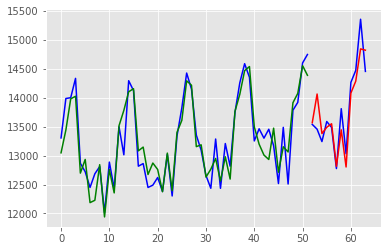

In [25]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = np.arange(0, 52, 1)

x3 = np.arange(52, 64, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



In [116]:
X

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
412,12419.0,13259.0,13945.0,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0
413,13259.0,13945.0,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0
414,13945.0,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988.0
415,13839.0,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988.0,14002.0
416,12387.0,12546.0,12038.0,11977.0,12336.0,11793.0,12877.0,11923.0,13306.0,13988.0,14002.0,14336.0
...,...,...,...,...,...,...,...,...,...,...,...,...
471,12509.0,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0
472,13785.0,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0
473,13921.0,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0,14268.0
474,14603.0,14749.0,13540.0,13457.0,13243.0,13590.0,13487.0,12776.0,13812.0,13032.0,14268.0,14473.0


In [117]:
y.tail()

471    13032
472    14268
473    14473
474    15359
475    14457
Name: t, dtype: int64

In [118]:
X_new.shape

(65, 12)

In [119]:
X_new[62][2]

13540.0

In [249]:
def prediction(model, X, y, month_num):
    X_new = X
    y_new = y.tolist()
    
    newrow_x = [0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(11):
        newrow_x[i] = X_new.iloc[X_new.shape[0]-1][i+1]
    newrow_x[11] = y_new[len(y_new)-1]
    
    y_pred = model.predict(X_new)
    y_new.append(y_pred[len(y_pred)-1][0])
    X_new = np.vstack([X_new, newrow_x])
    
    for i in range(2, month_num+1, 1):
        newrow_x = [0,0,0,0,0,0,0,0,0,0,0,0]
        newrow_y = [0]
        for j in range(11):
            newrow_x[j] = X_new[X_new.shape[0]-1][j+1]
        newrow_x[11] = y_new[len(y_new)-1]
        
        y_pred = model.predict(X_new)
        y_new.append(y_pred[len(y_pred)-1][0])
        X_new = np.vstack([X_new, newrow_x])
        
    
    return X_new, y_new

In [276]:
#Вычисляем прогноз вперёд на month_num дней
X_new, y_new = prediction(model, X, y, 8)

In [277]:
X_new.shape

(72, 12)

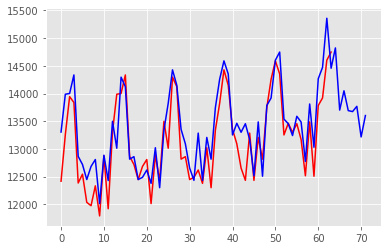

In [278]:
#   График с результатами

x_data = np.arange(0, 64, 1)

x_future = np.arange(0, 72, 1)

plt.plot(x_data, elec_short[:64], color='red')

#Модель + Предсказание
plt.plot(x_future, y_new, color='blue')
